In [1]:
#  This code cell will not be shown in the HTML version of this notebook
# import various basic libraries
import copy
import matplotlib.pyplot as plt
import sys
sys.path.append('../../')

# import autograd functionality
import autograd.numpy as np

# imports from custom library
from mlrefined_libraries import nonlinear_superlearn_library as nonlib
datapath = '../../mlrefined_datasets/nonlinear_superlearn_datasets/'
regress_plotter = nonlib.nonlinear_regression_demos
feature_plotter = nonlib.perceptron_scaling_tools

# this is needed to compensate for %matplotl+ib notebook's tendancy to blow up images when plotted inline
from matplotlib import rcParams
rcParams['figure.autolayout'] = True
%matplotlib notebook

%load_ext autoreload
%autoreload 2

What about the following newtwork architecture.

\begin{equation}
\text{model}\left(\mathbf{x},\mathbf{w}\right) = w_0 + f_1\left(\mathbf{x}\right)w_1 + f_2\left(\mathbf{x}\right)w_2 
\end{equation}

and in particular

\begin{equation}
\text{model}\left(\mathbf{x},\mathbf{w}\right) = w_0 + f_1\left(w_{0,1}^{(1)} + w_{1,1}^{(1)}x \right)w_1 + f_2\left(w_{0,2}^{(1)} + w_{1,2}^{(1)}x \right)w_2
\end{equation}

<IPython.core.display.Javascript object>


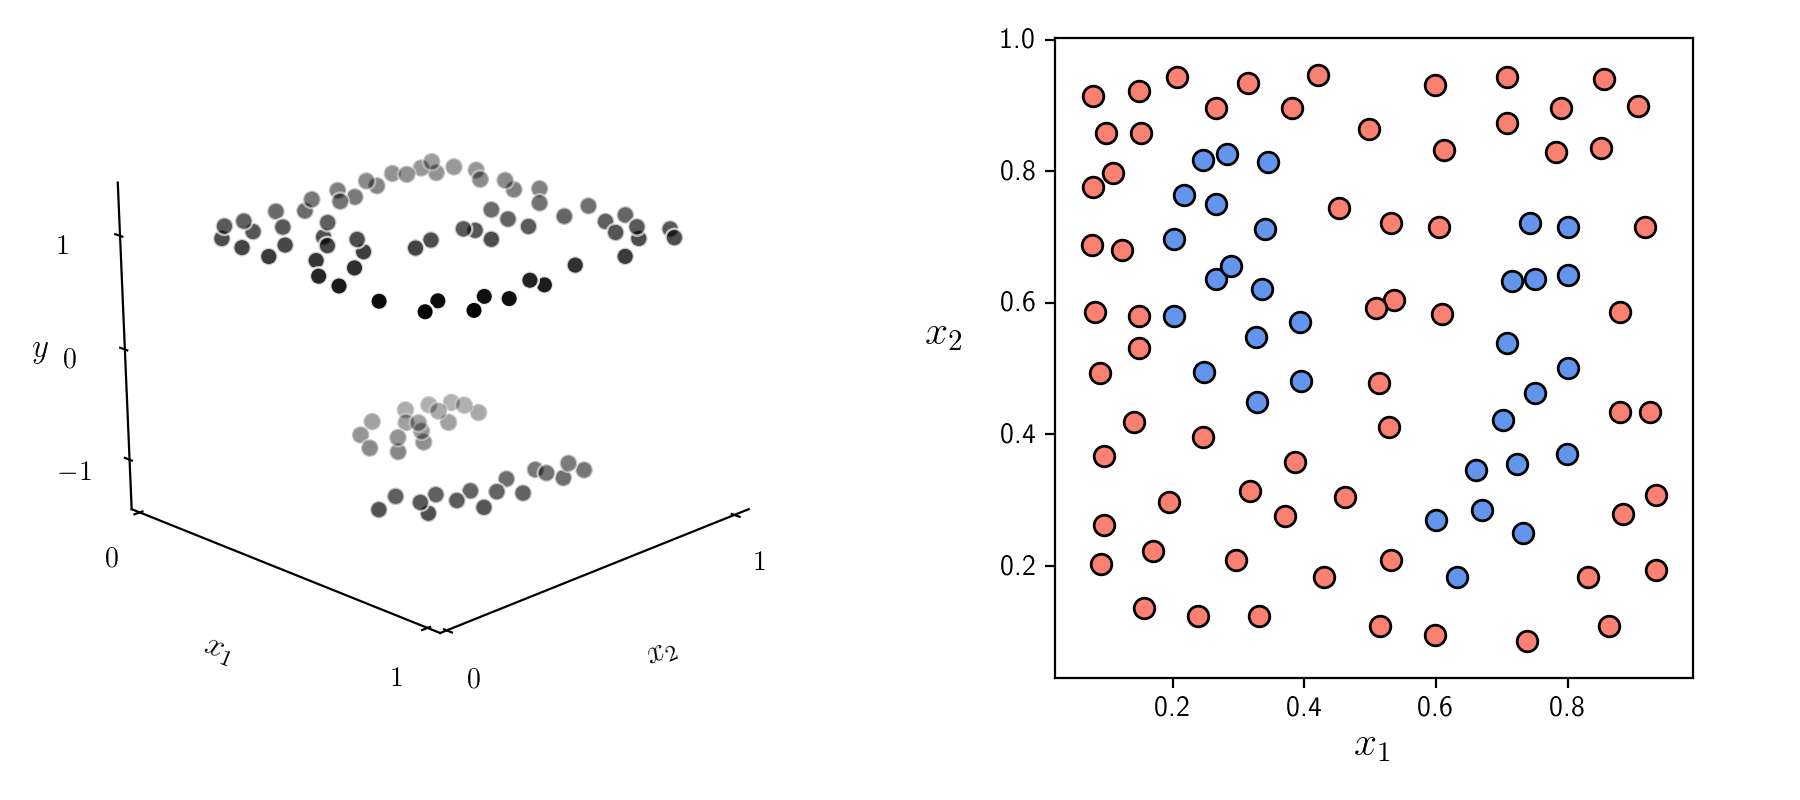

In [2]:
# create instance of linear regression demo, used below and in the next examples
demo = nonlib.nonlinear_classification_visualizer.Visualizer(datapath + '2eggs_data.csv')
x = demo.x.T
y = demo.y[np.newaxis,:]

# an implementation of the least squares cost function for linear regression for N = 2 input dimension datasets
demo.plot_data()

In [6]:
# create initial weights for arbitrary feedforward network
def initialize_network_weights(layer_sizes, scale):
    # container for entire weight tensor
    weights = []
    
    # loop over desired layer sizes and create appropriately sized initial 
    # weight matrix for each layer
    for k in range(len(layer_sizes)-1):
        # get layer sizes for current weight matrix
        U_k = layer_sizes[k]
        U_k_plus_1 = layer_sizes[k+1]

        # make weight matrix
        weight = scale*np.random.randn(U_k+1,U_k_plus_1)
        weights.append(weight)

    # re-express weights so that w_init[0] = omega_inner contains all 
    # internal weight matrices, and w_init = w contains weights of 
    # final linear combination in predict function
    w_init = [weights[:-1],weights[-1]]
    
    return w_init

# choose a nonlinear activation function 
def activation(t):
#     nonlinearity = np.tanh(t)
    nonlinearity = np.maximum(0,t)
    return nonlinearity

# fully evaluate our network features using the tensor of weights in w
def feature_transforms(a, w):    
    # loop through each layer matrix
    for W in w:
        #  pad with ones (to compactly take care of bias) for next layer computation        
        o = np.ones((1,np.shape(a)[1]))
        a = np.vstack((o,a))
        
        # compute inner product with current layer weights
        a = np.dot(a.T, W).T
    
        # output of layer activation
        a = activation(a)
    return a

# fully evaluate our network features using the tensor of weights in w
def feature_transforms_normalized(a, w):    
    # loop through each layer matrix
    for W in w:
        #  pad with ones (to compactly take care of bias) for next layer computation        
        o = np.ones((1,np.shape(a)[1]))
        a = np.vstack((o,a))
        
        # compute inner product with current layer weights
        a = np.dot(a.T, W).T
    
        # output of layer activation
        a = activation(a)
        
        # normalize output
        mynorm = nonlib.library_v1.normalizers.Setup(a,name = 'standard')
        a = mynorm.normalizer(a)

    return a

In [42]:
w = initialize_network_weights([2,2,1],0.01)

In [43]:
# run
alpha_choice = 10**(-1); max_its = 5000;
run = nonlib.basic_runner.Setup(x,y,feature_transforms,'softmax',normalize = 'standard')
run.fit(w=w,alpha_choice = alpha_choice,max_its=max_its)


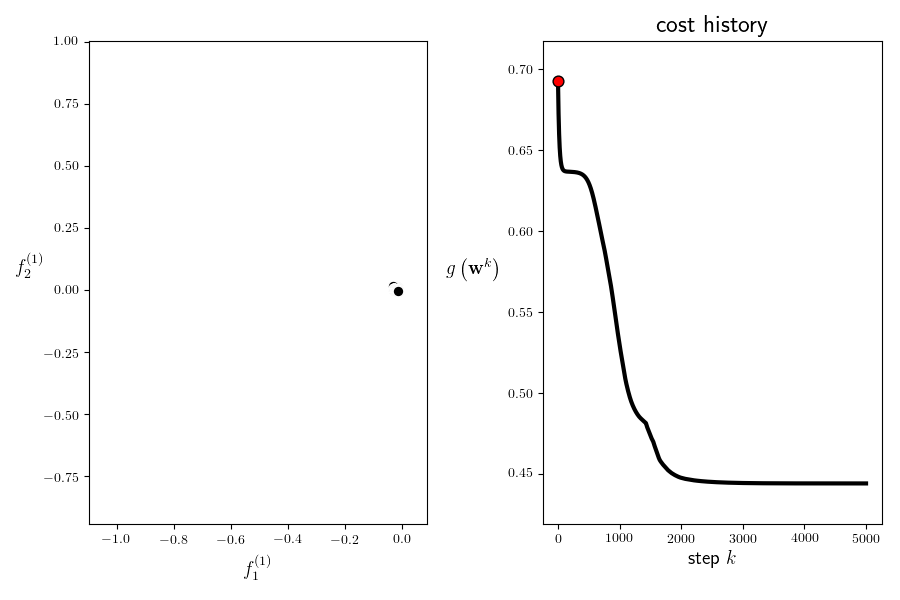
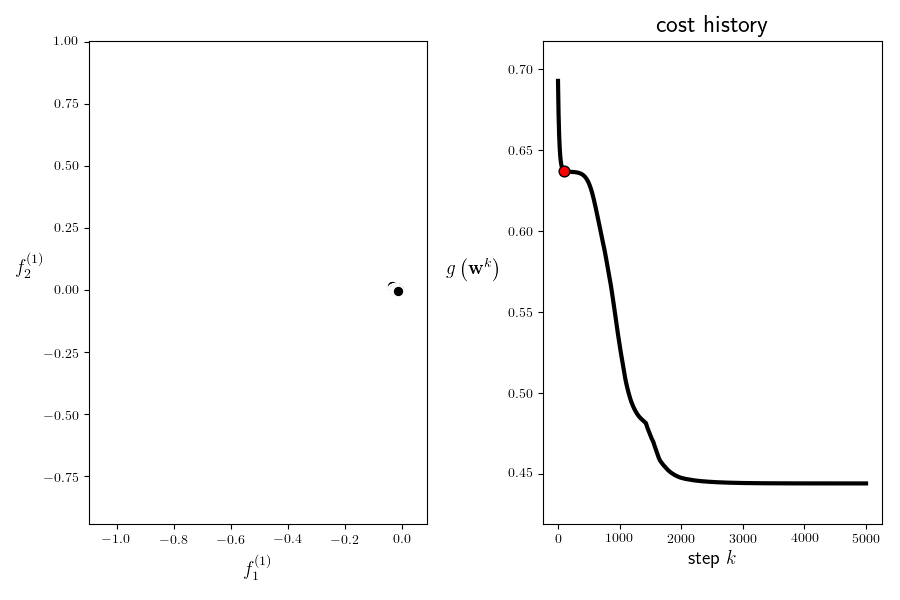
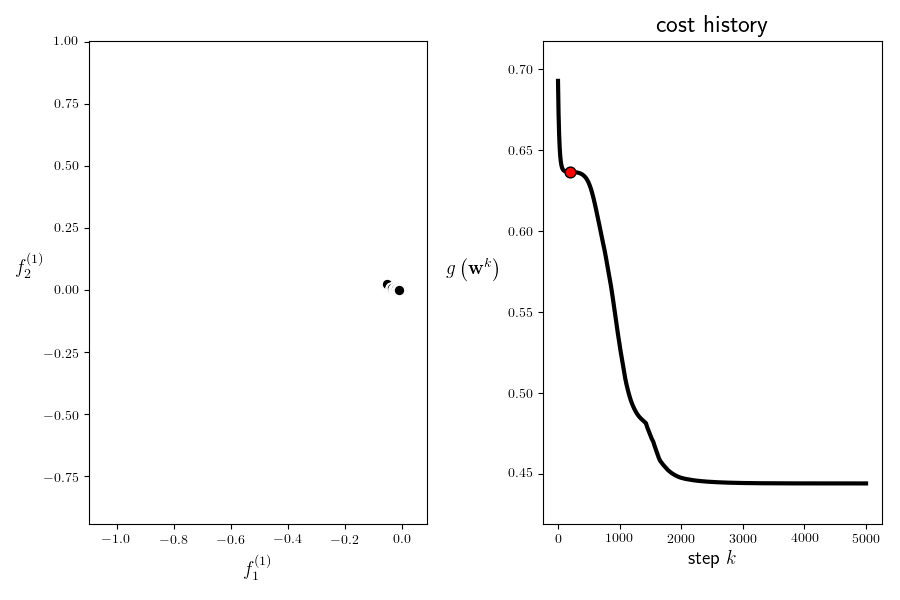
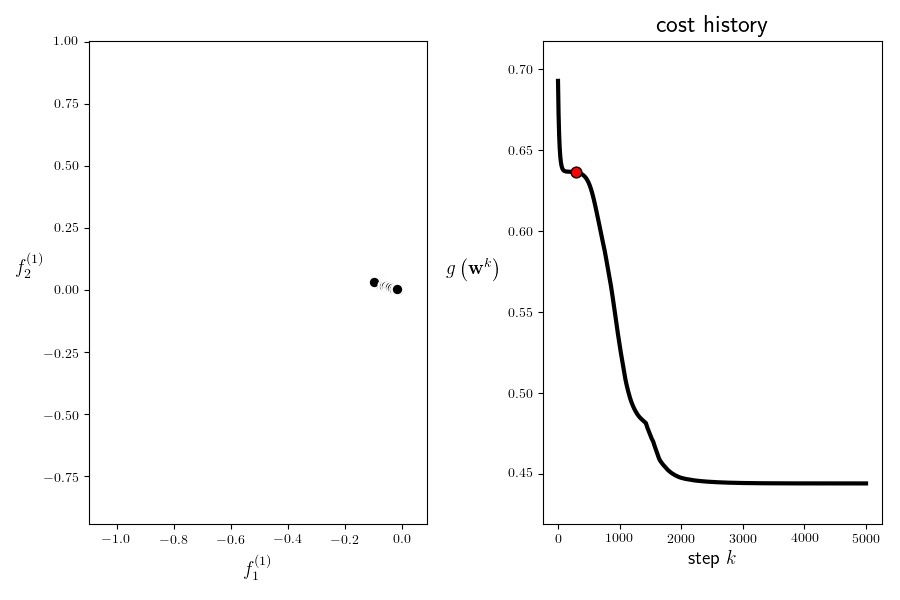
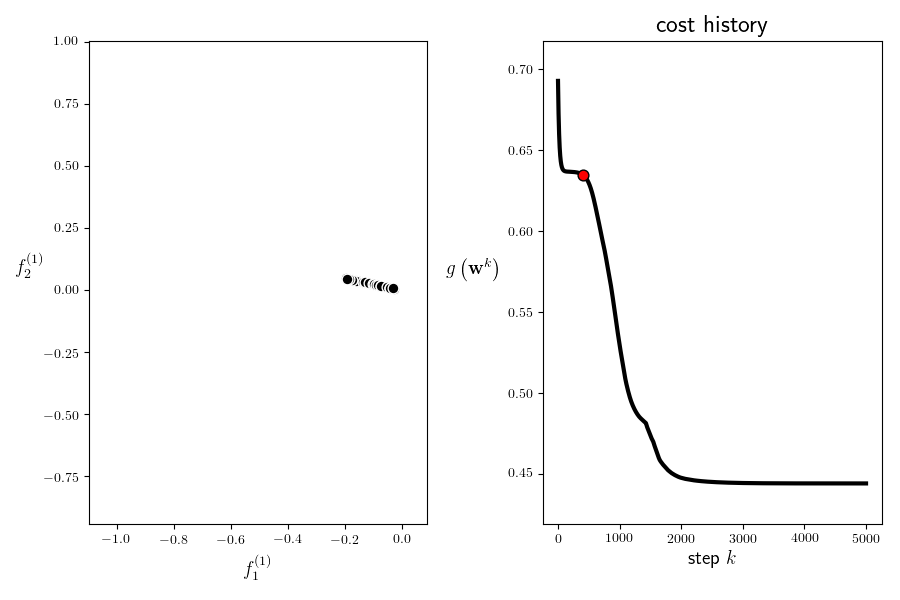
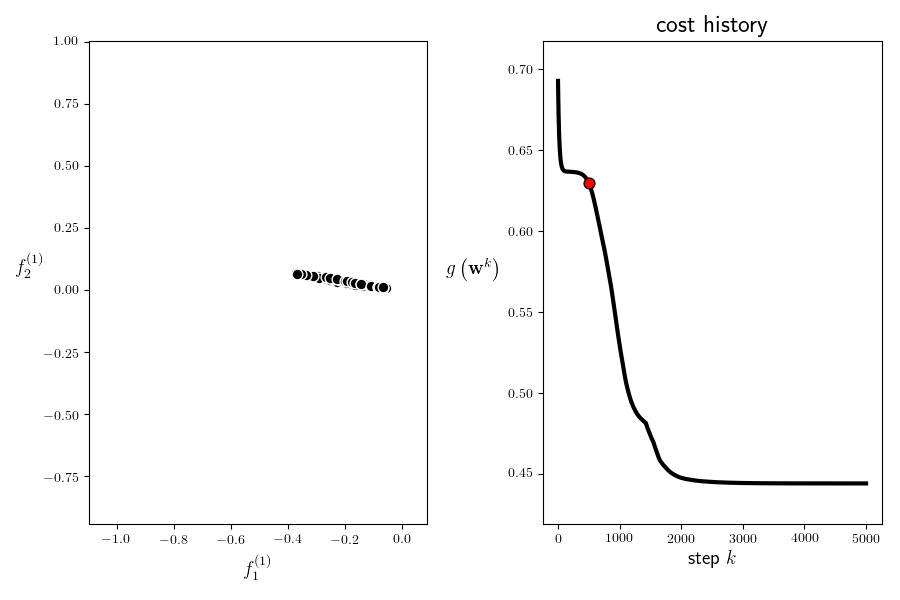
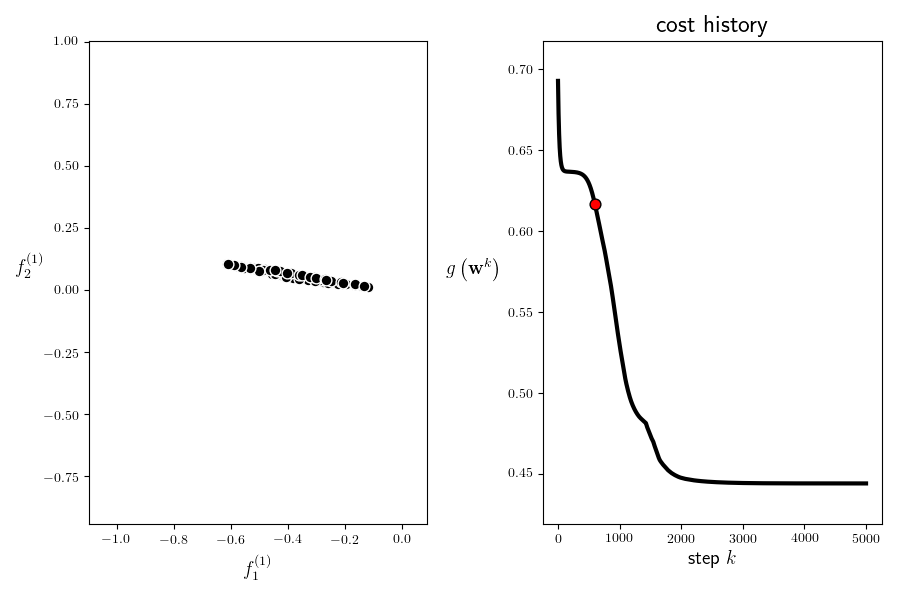
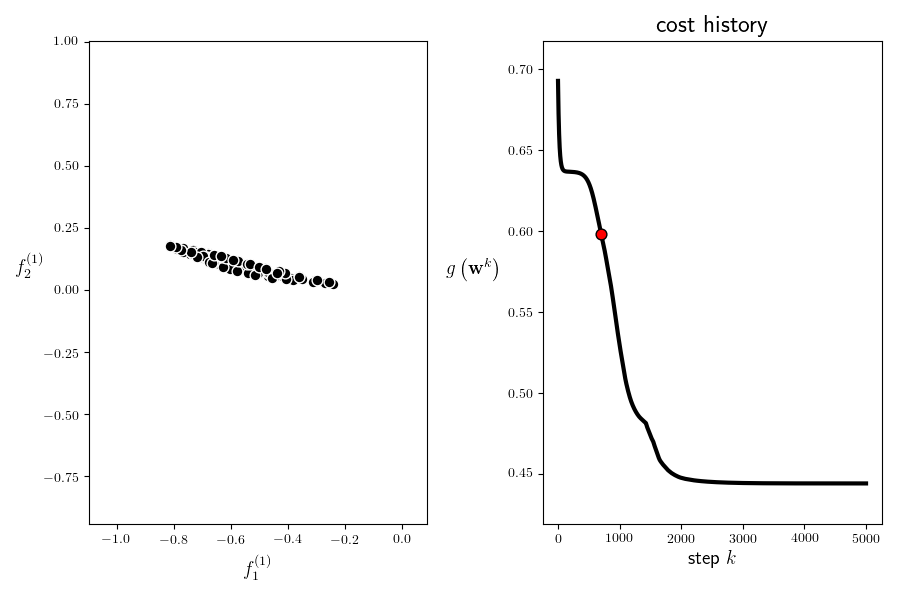
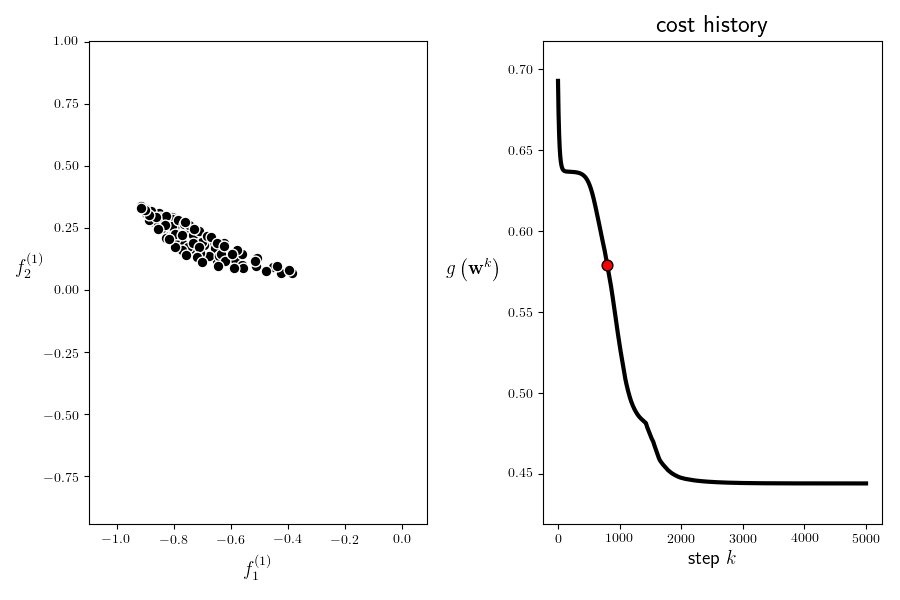
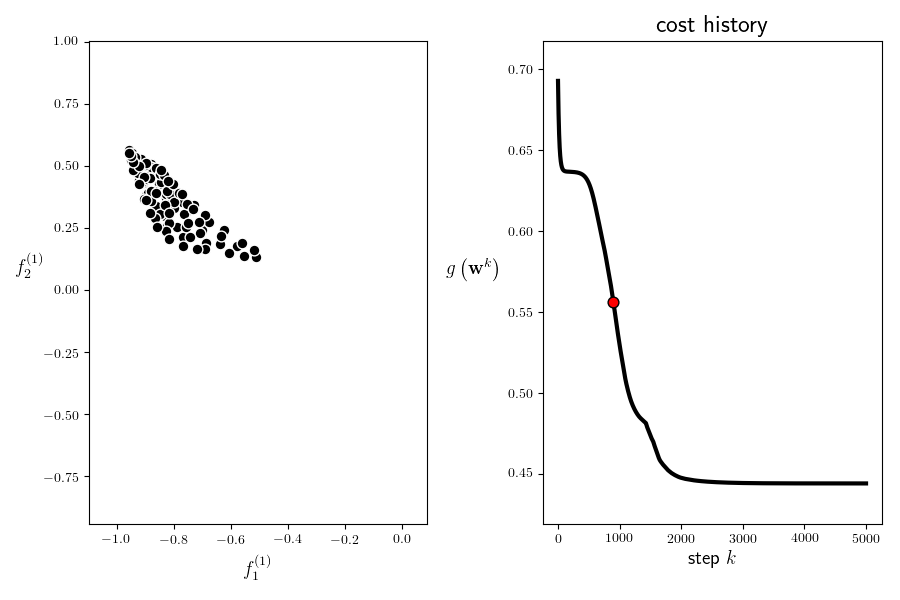
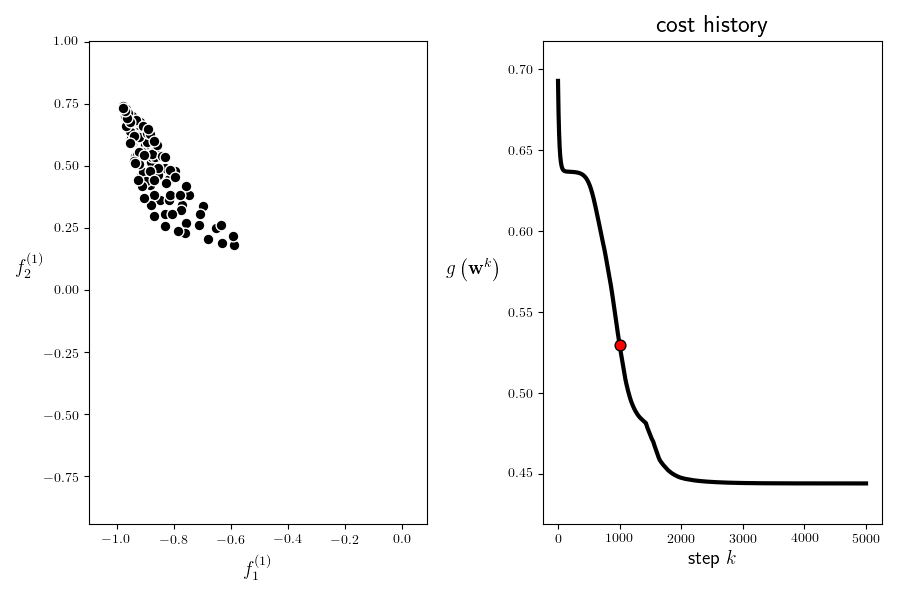
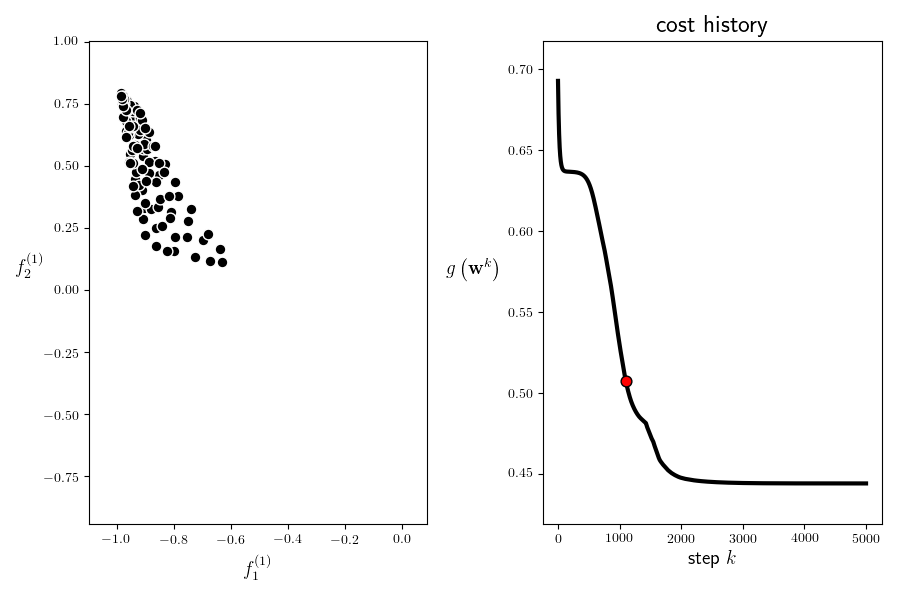
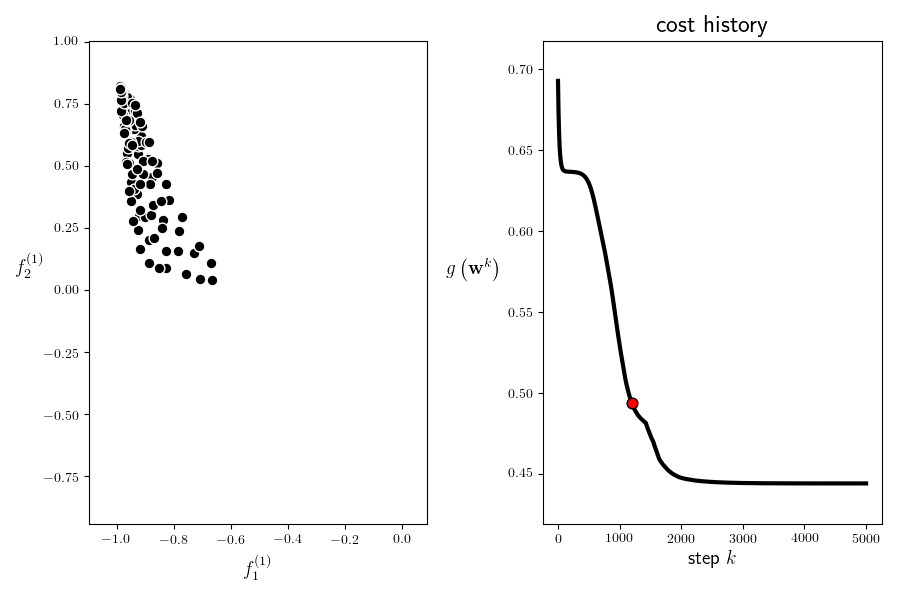
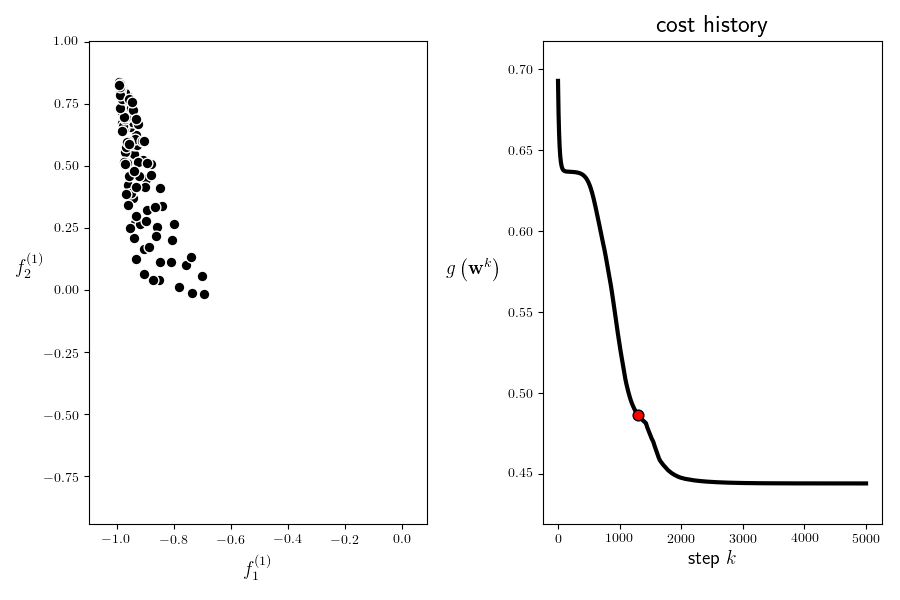
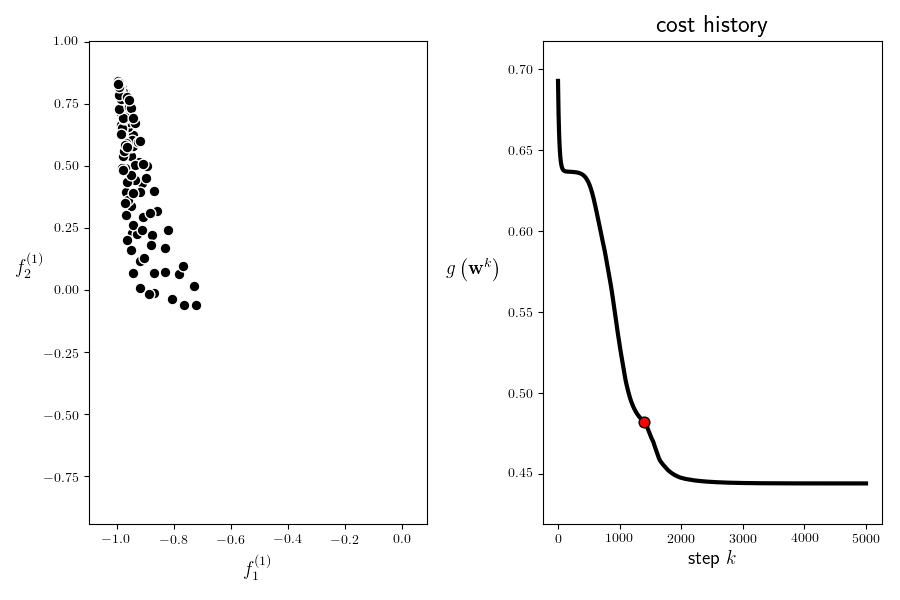
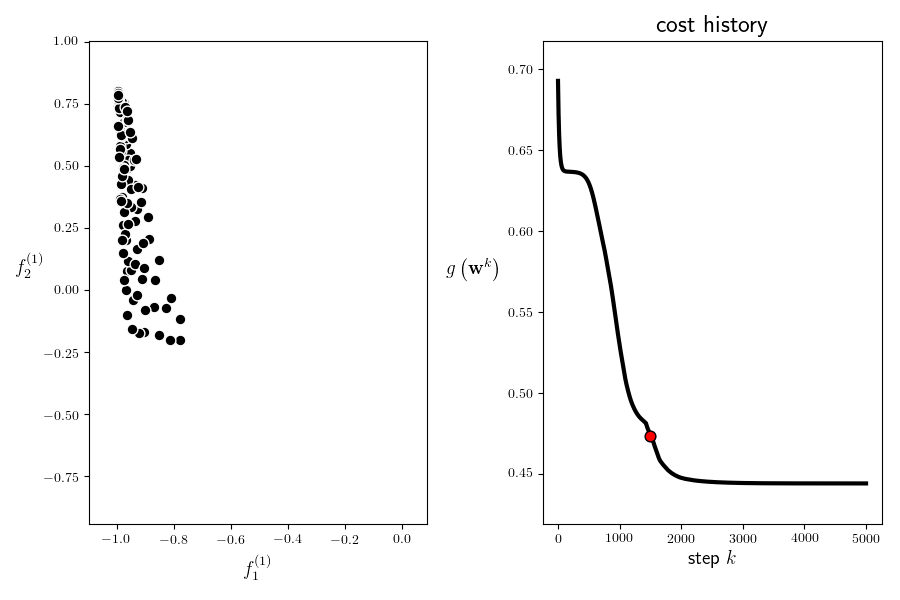
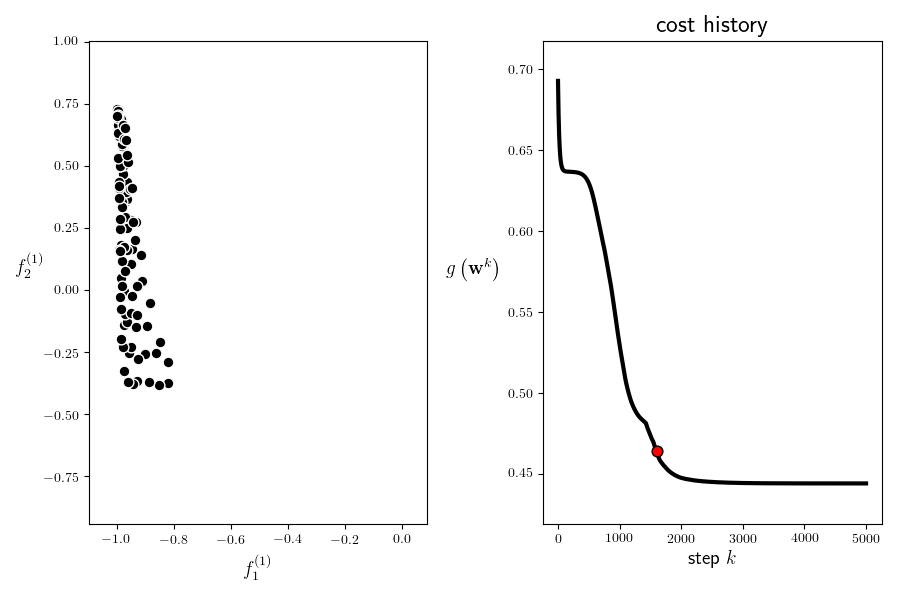
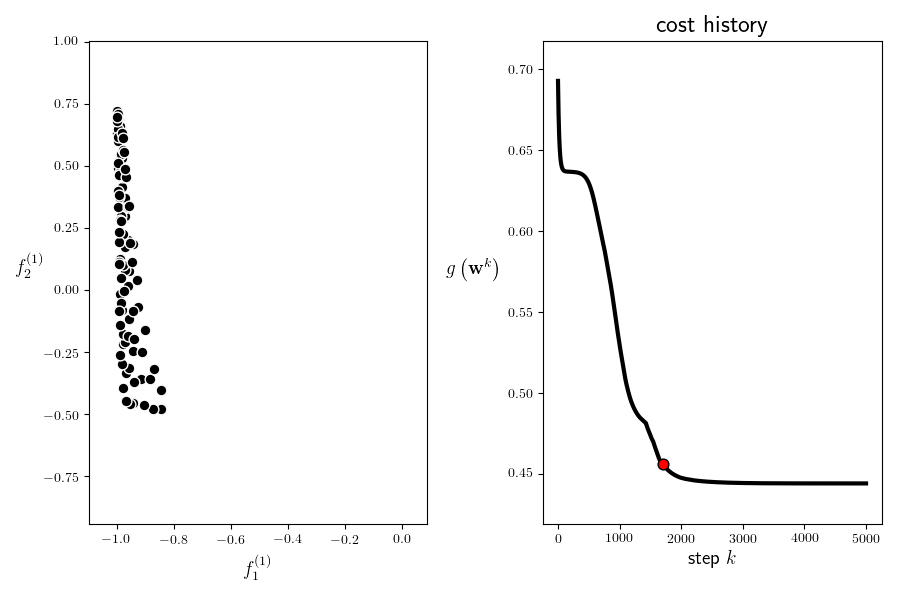
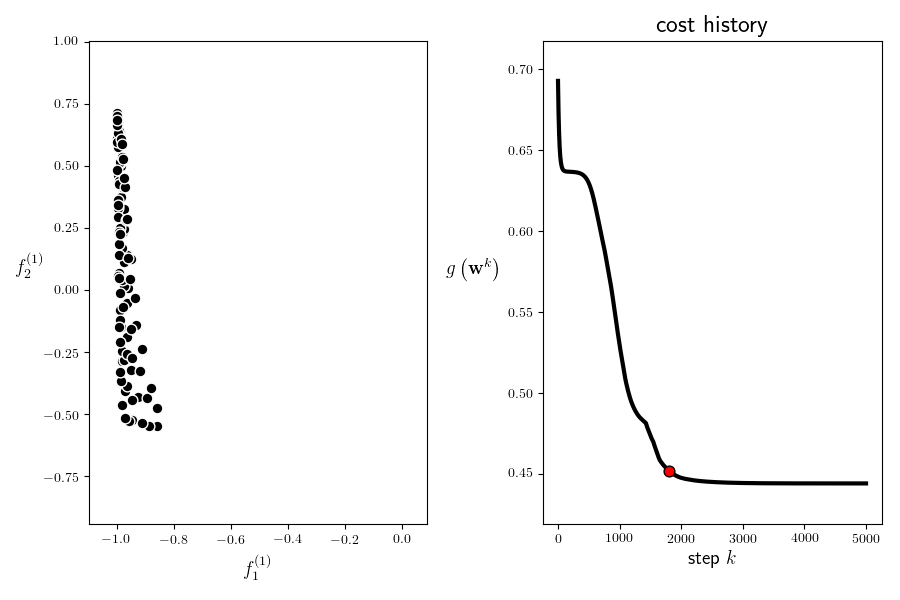
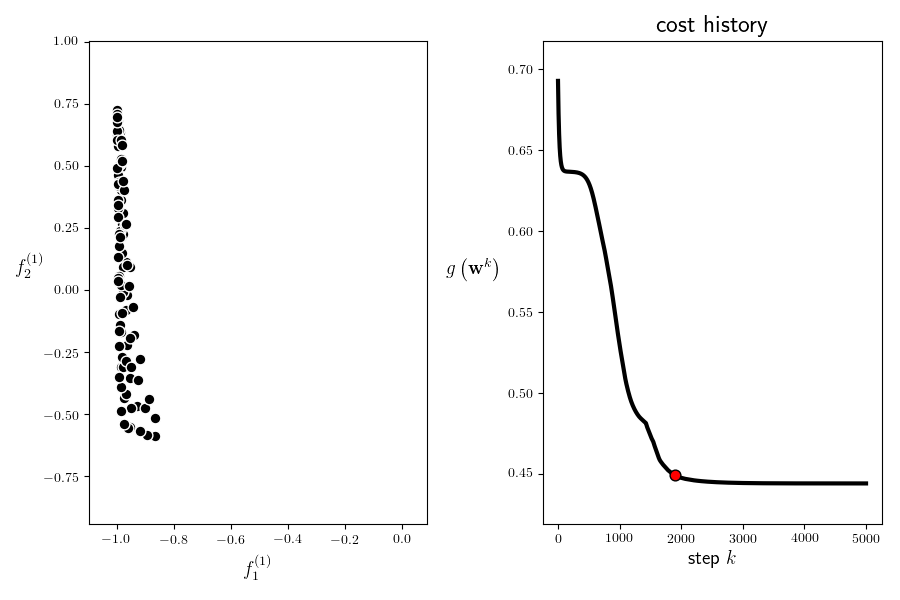
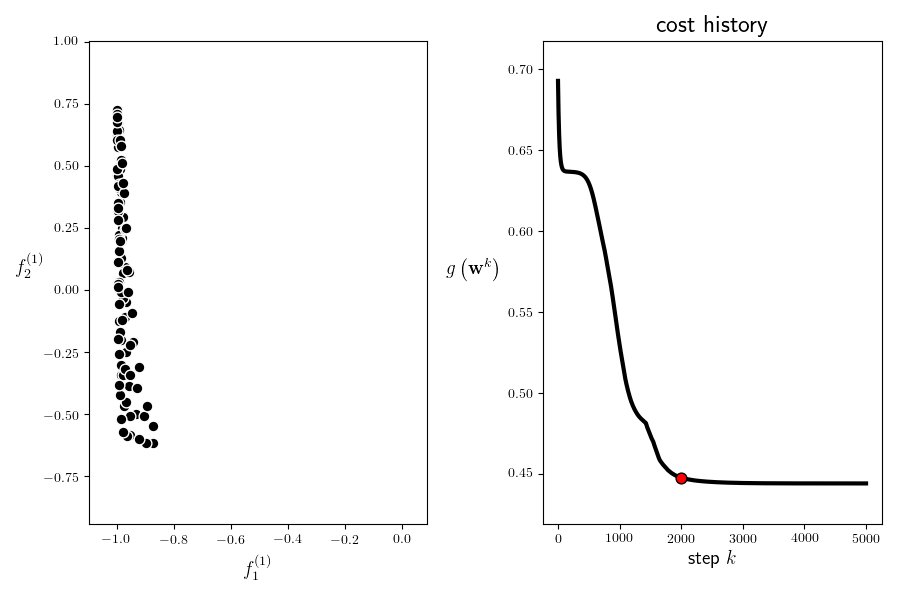
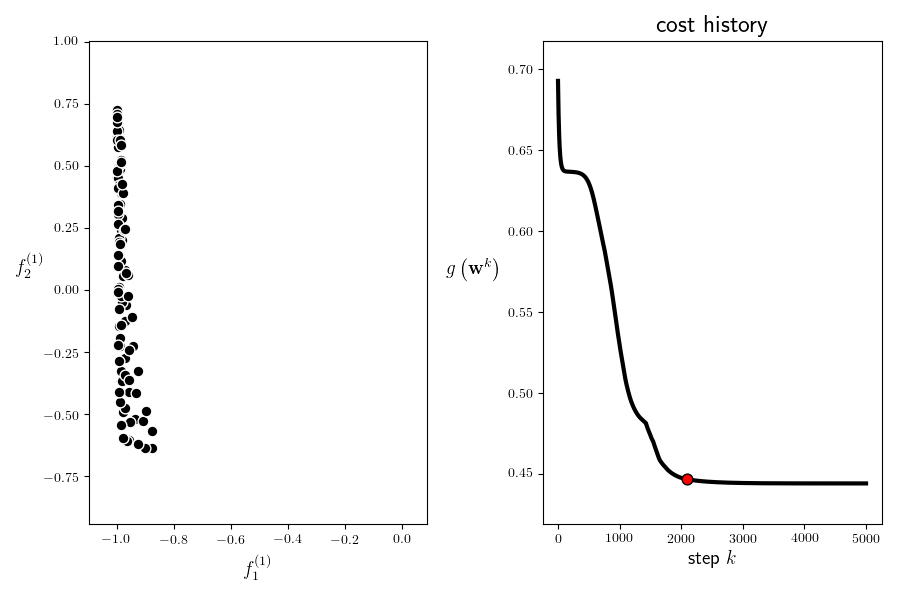
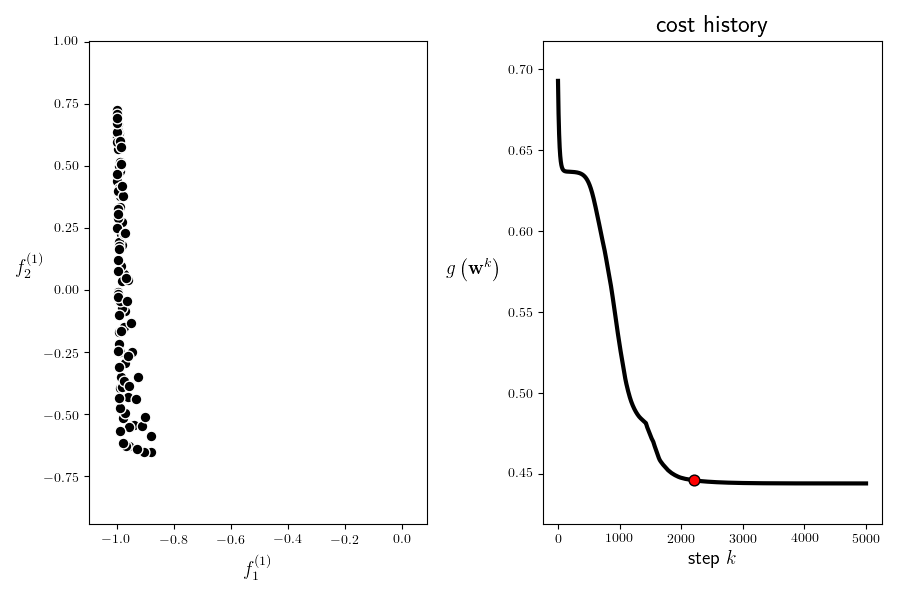
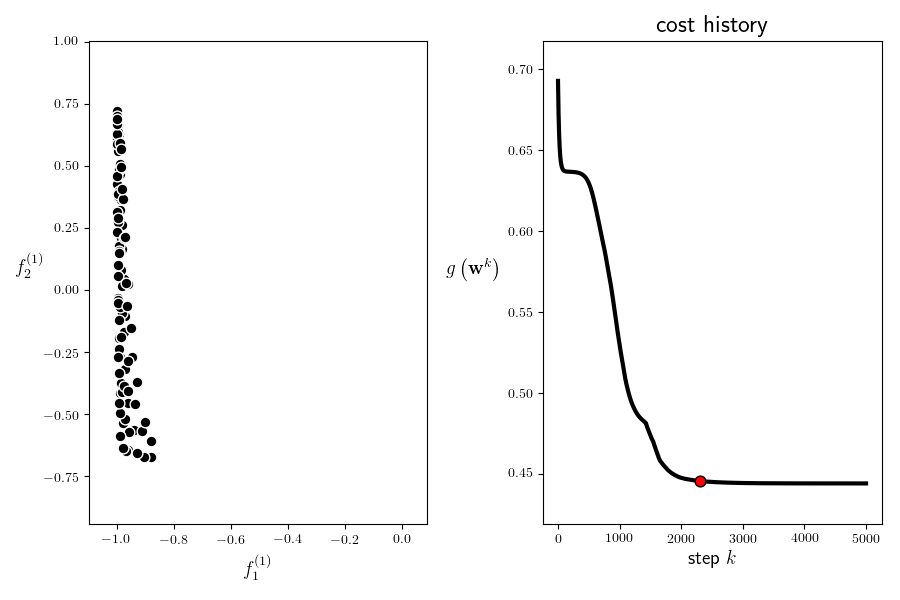
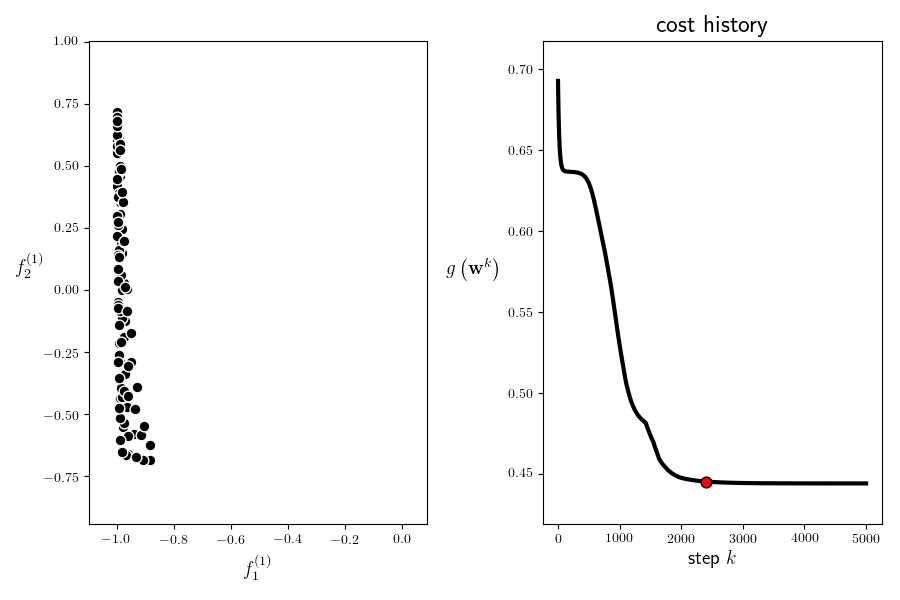
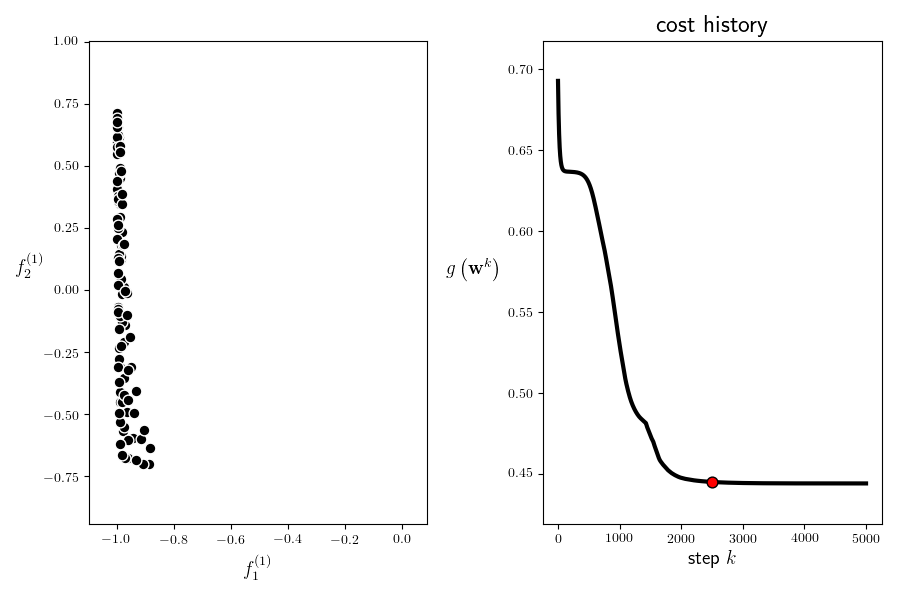
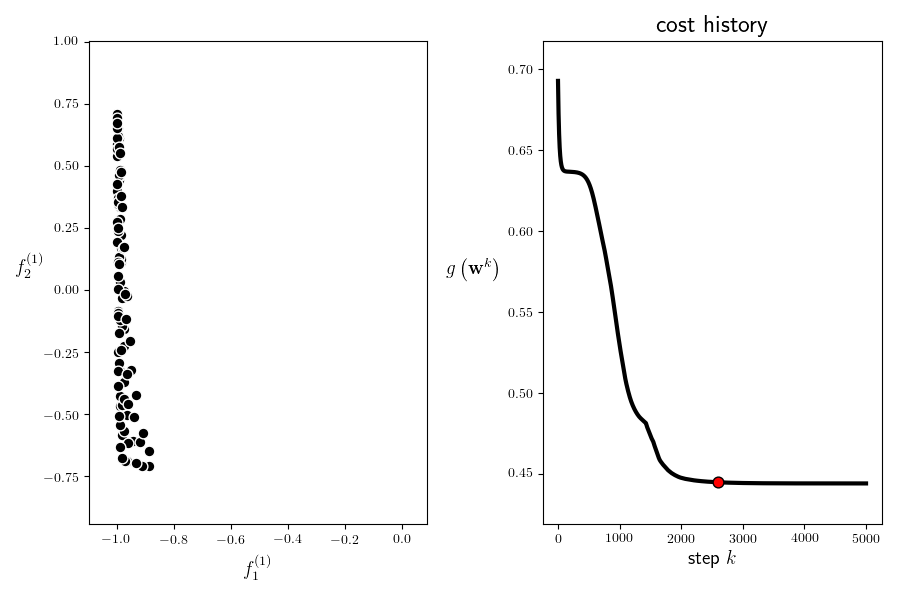
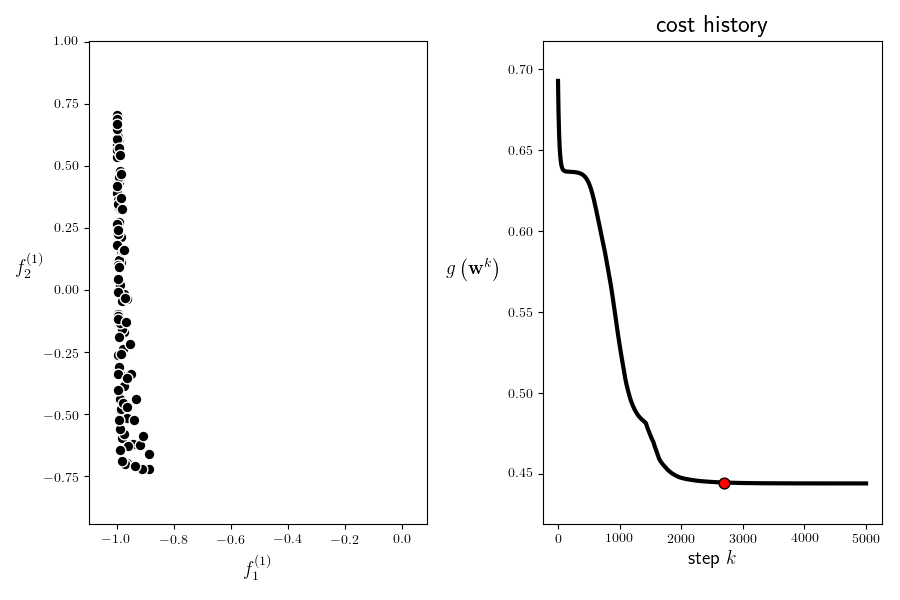
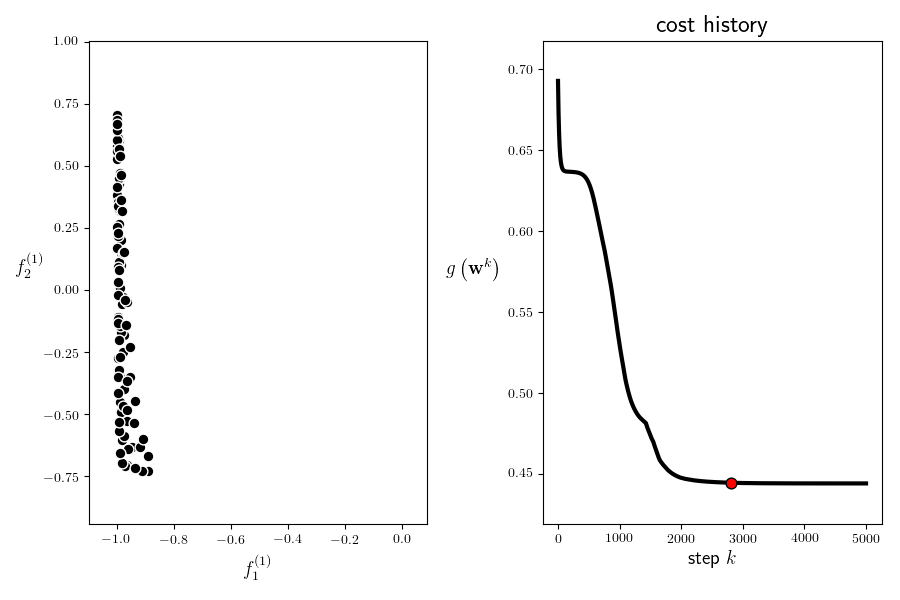
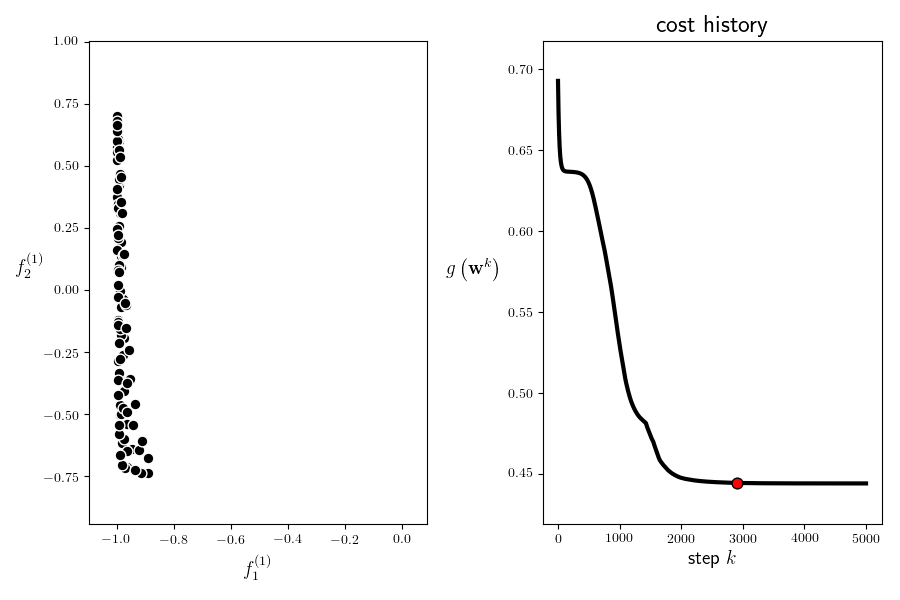
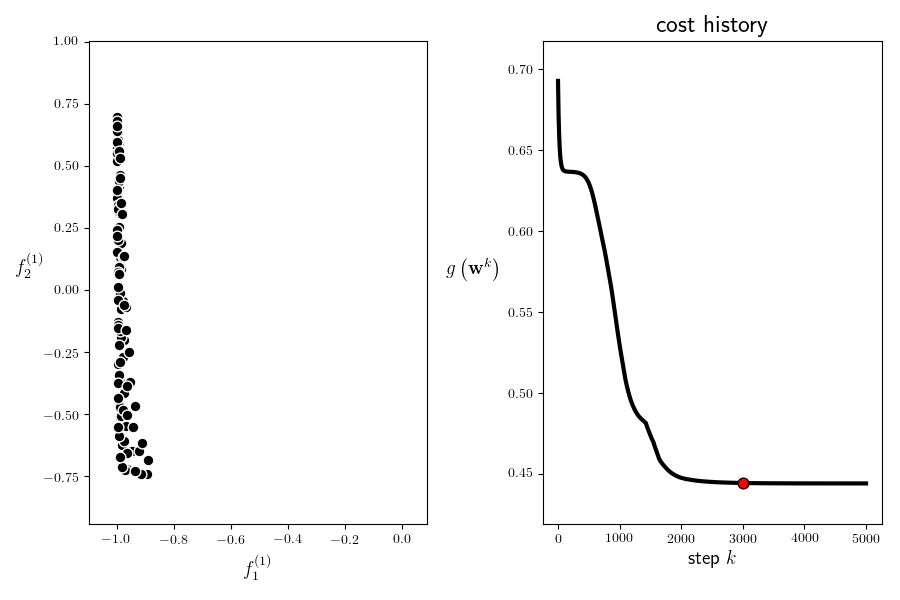
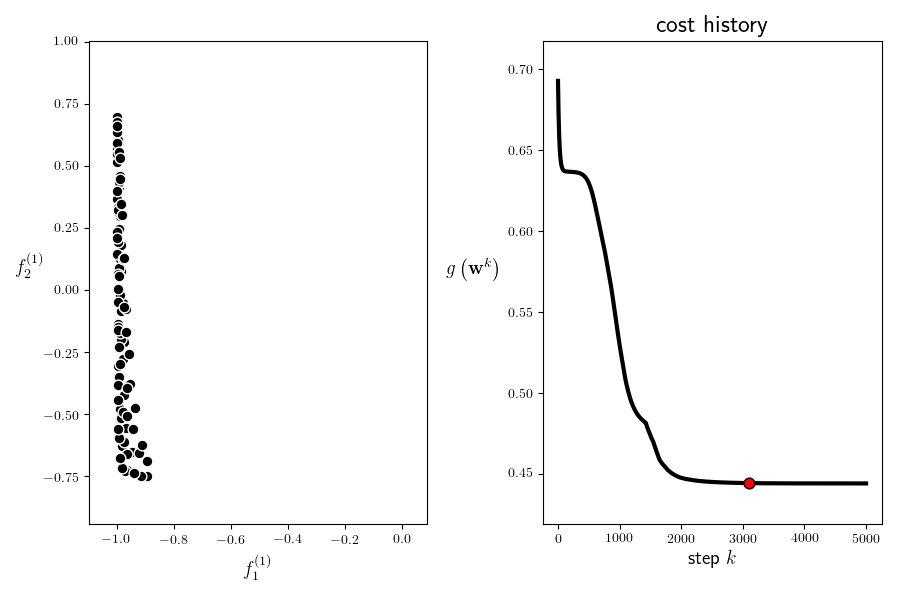
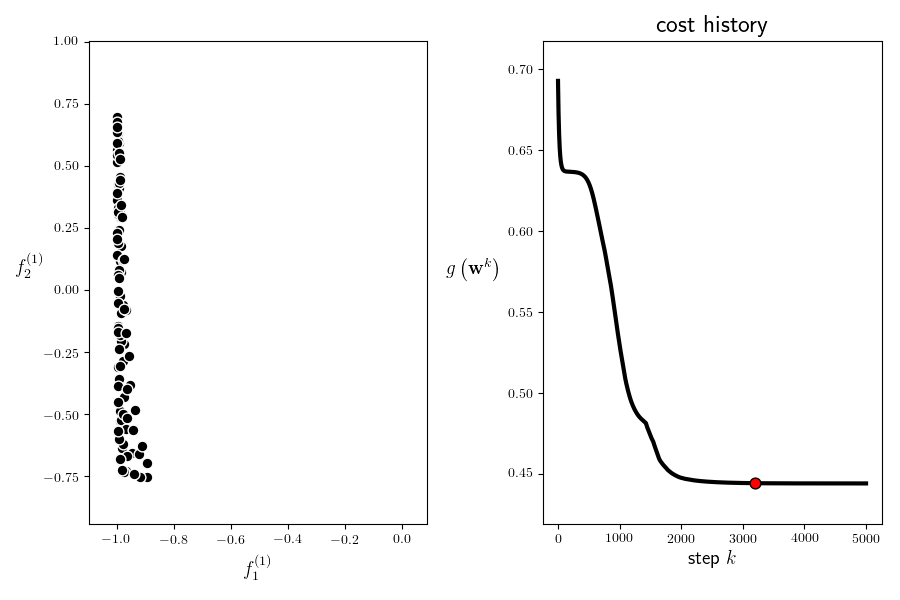
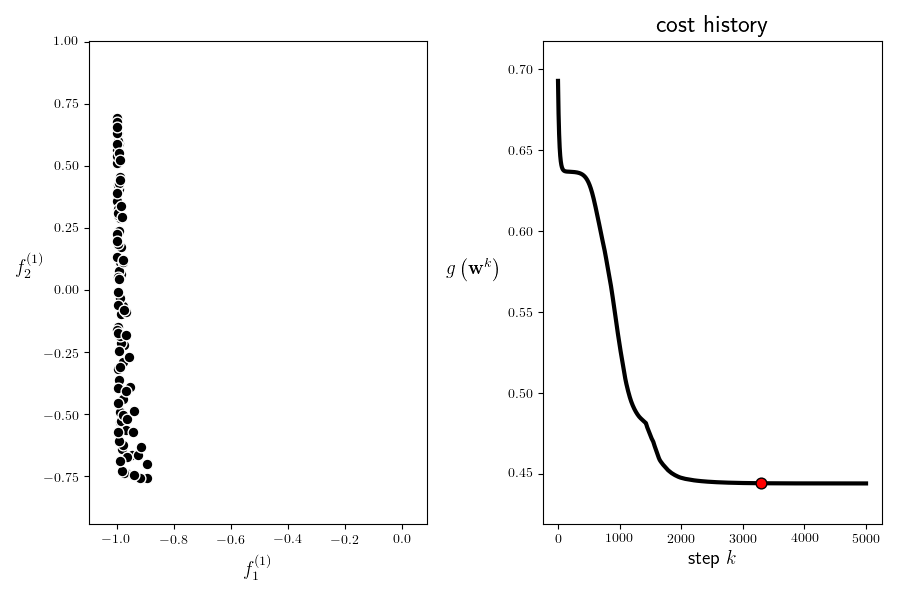
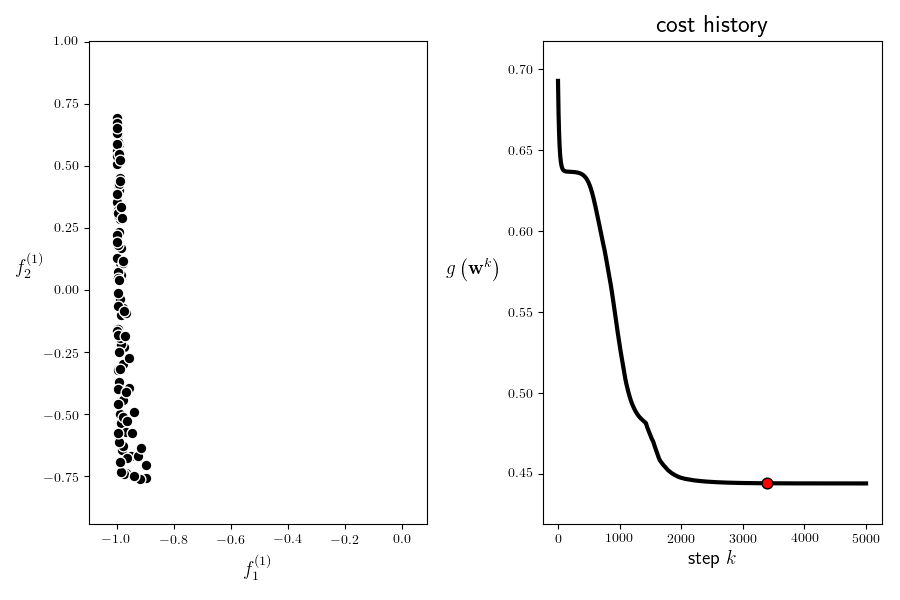
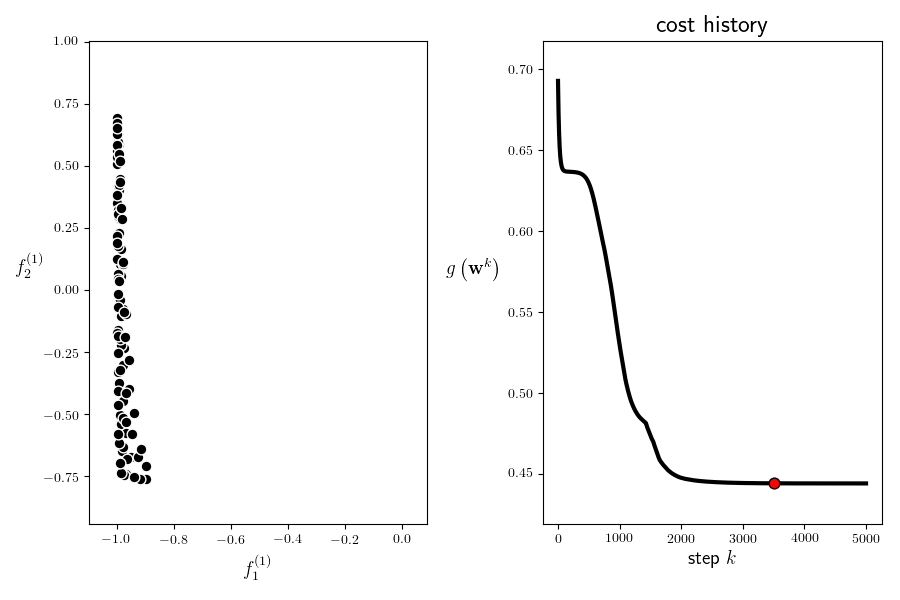
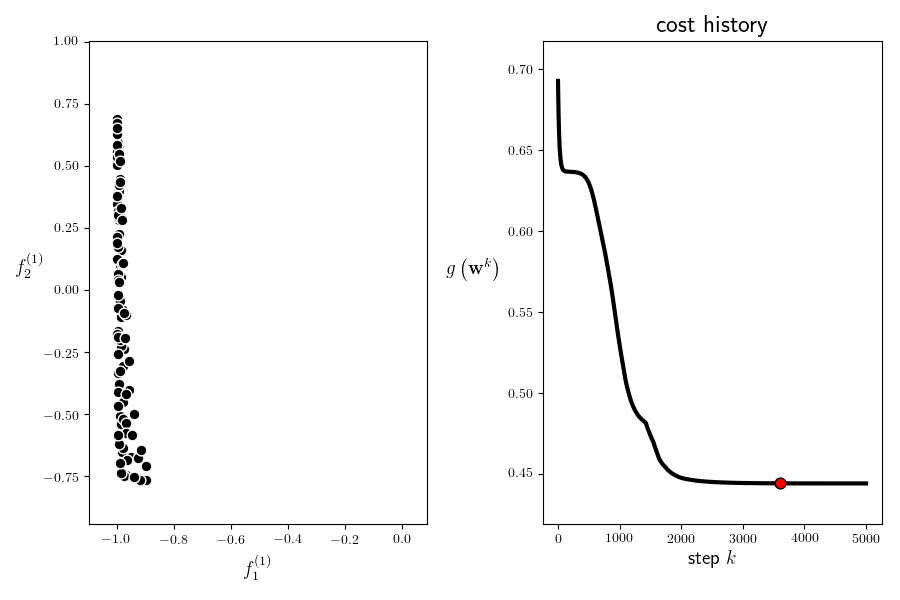
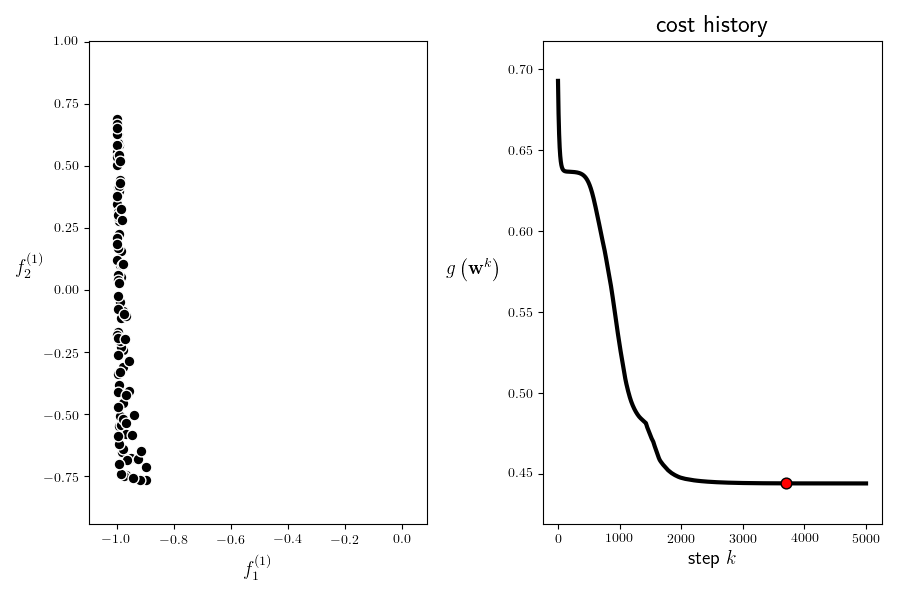
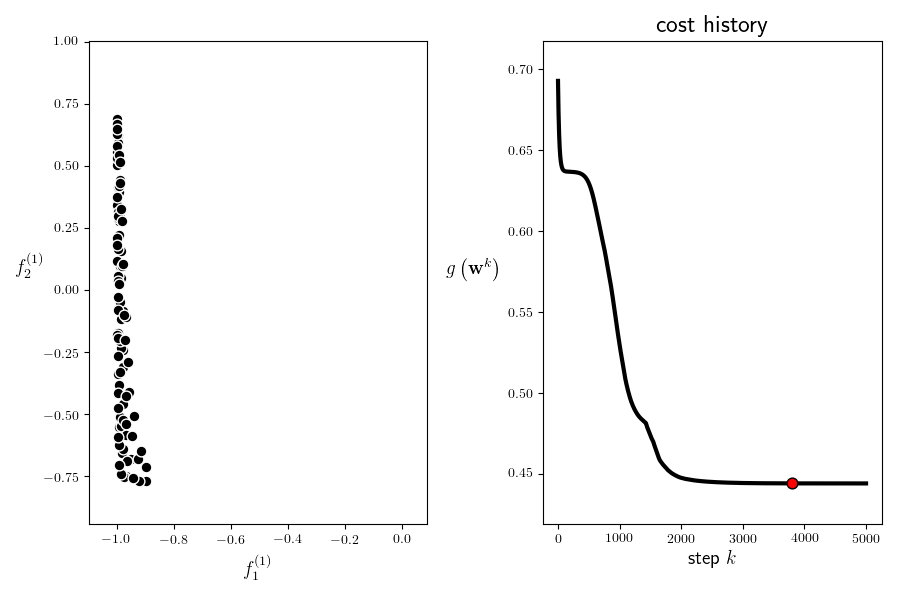
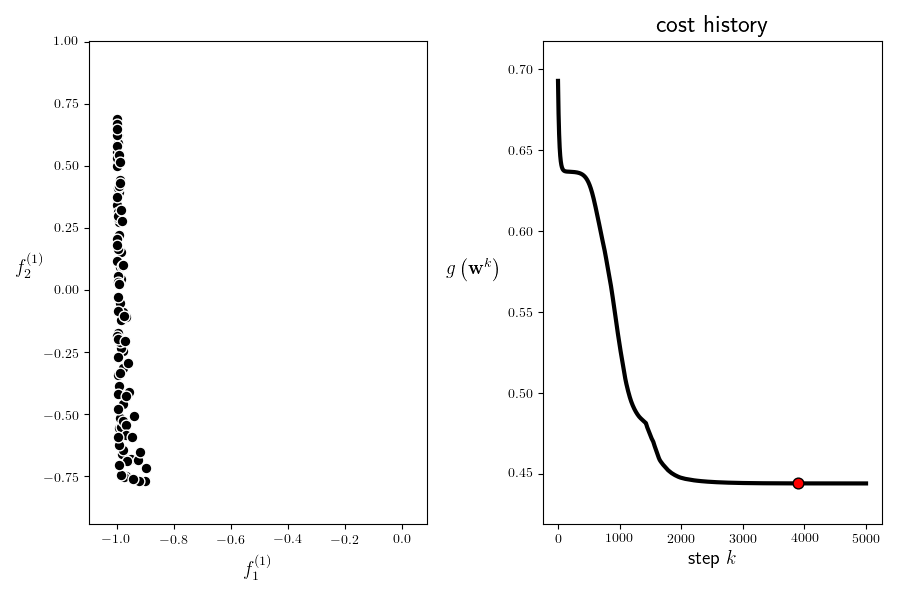
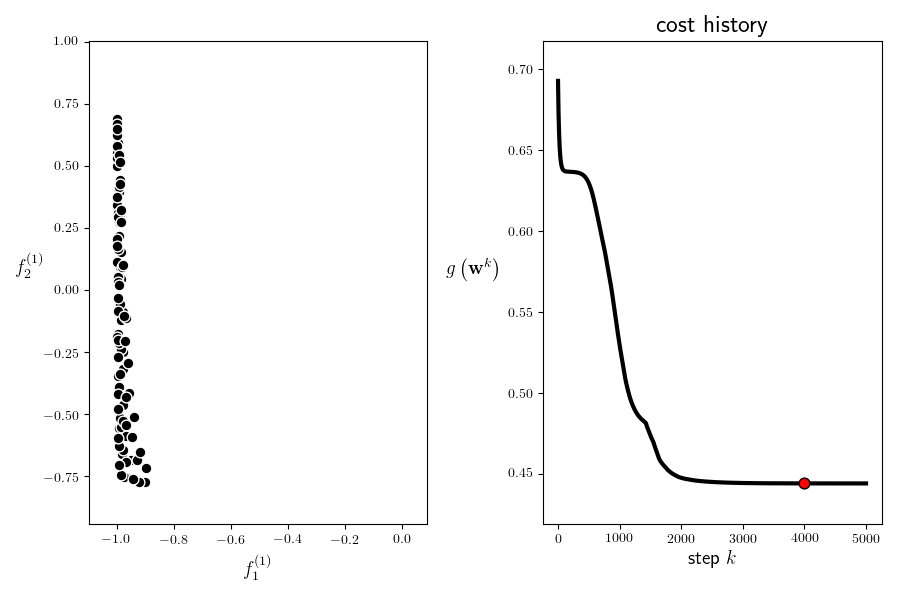
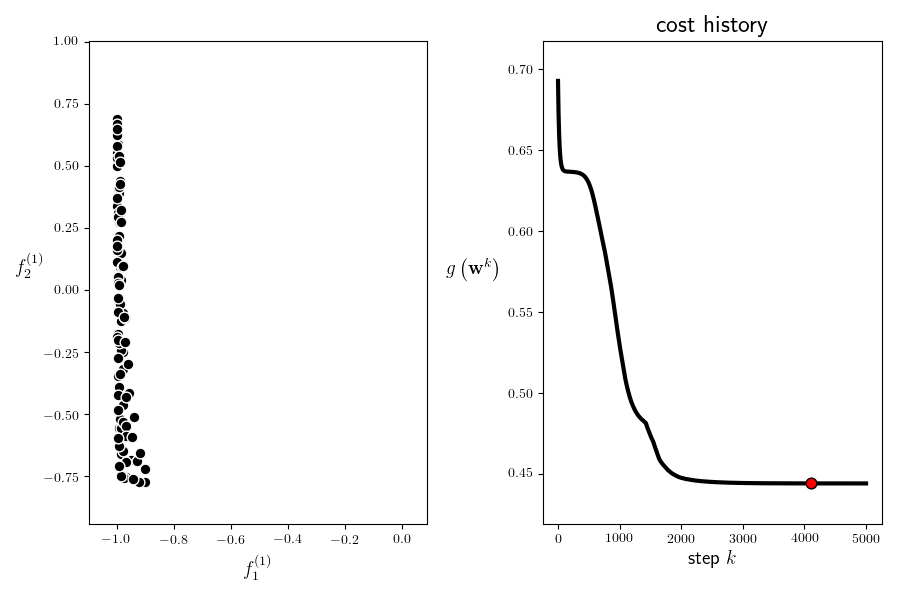
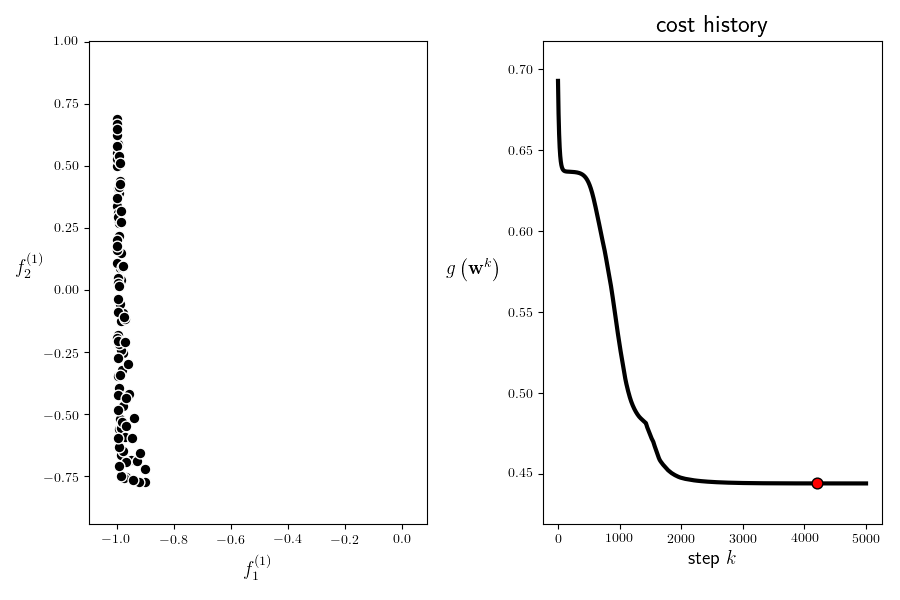
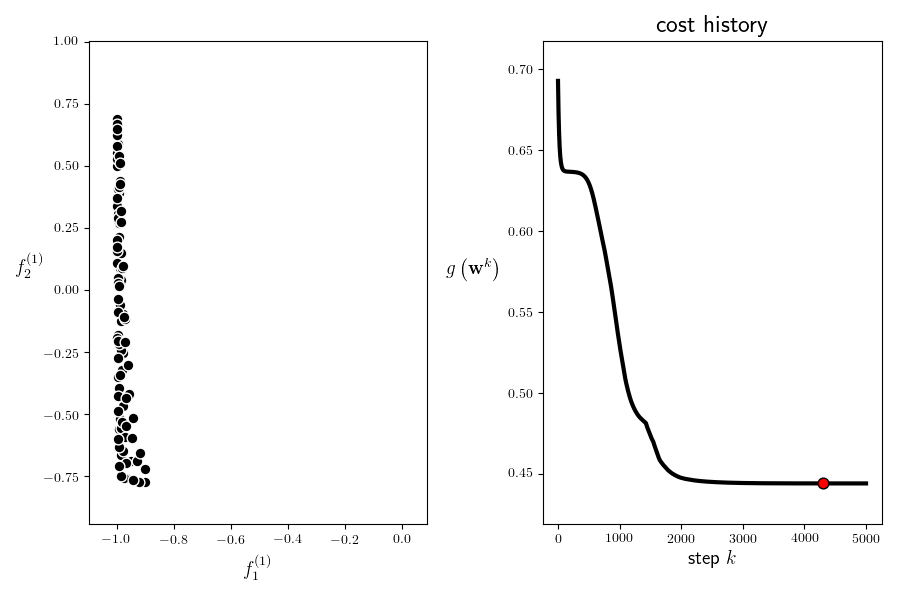
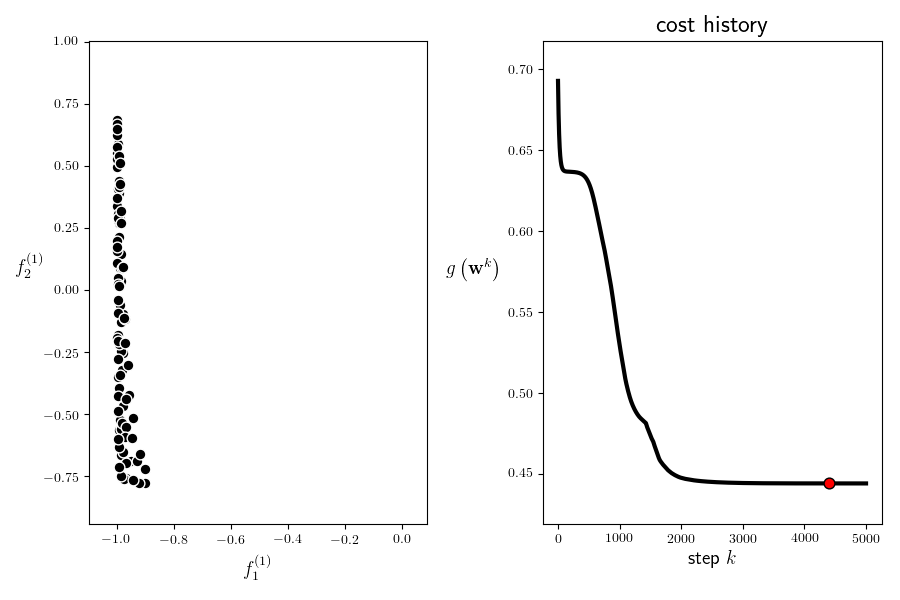
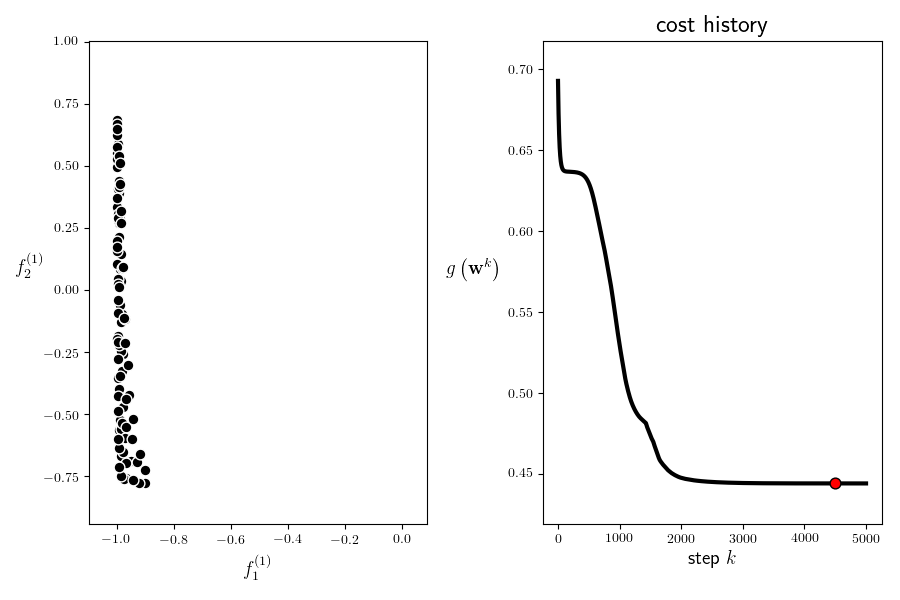
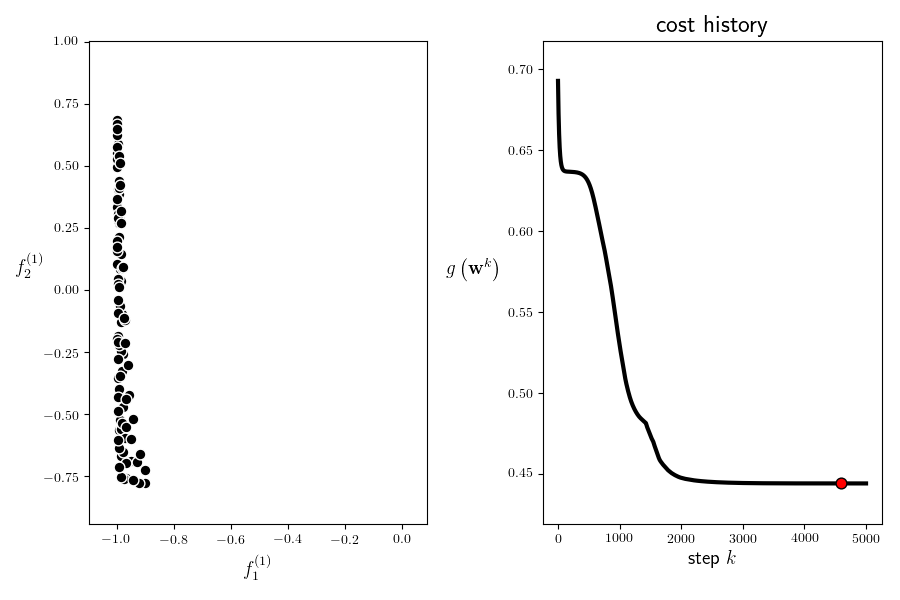
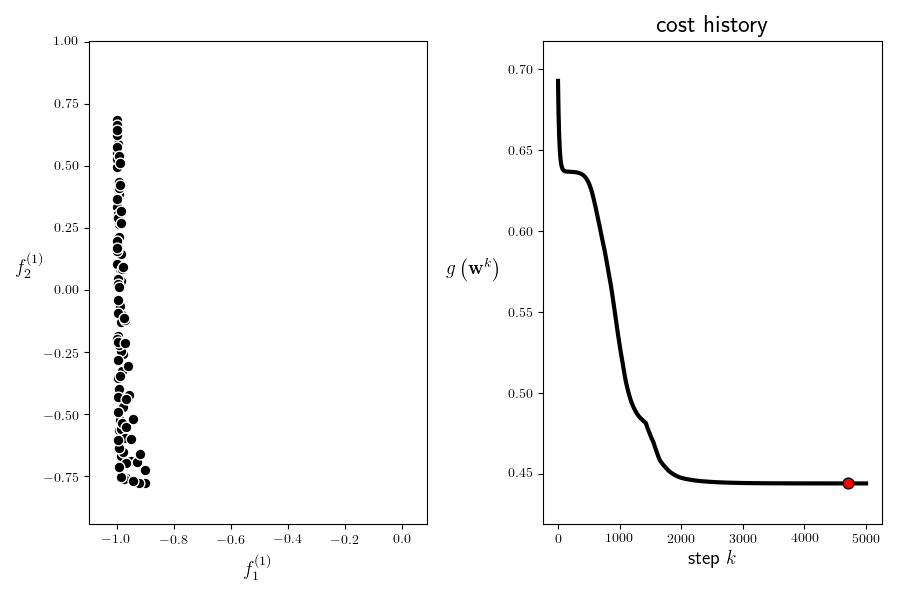
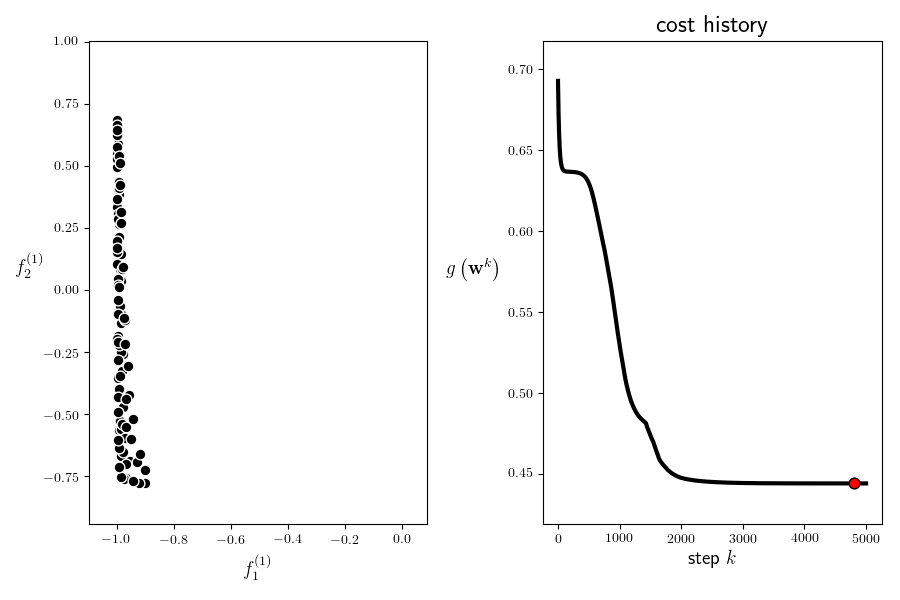
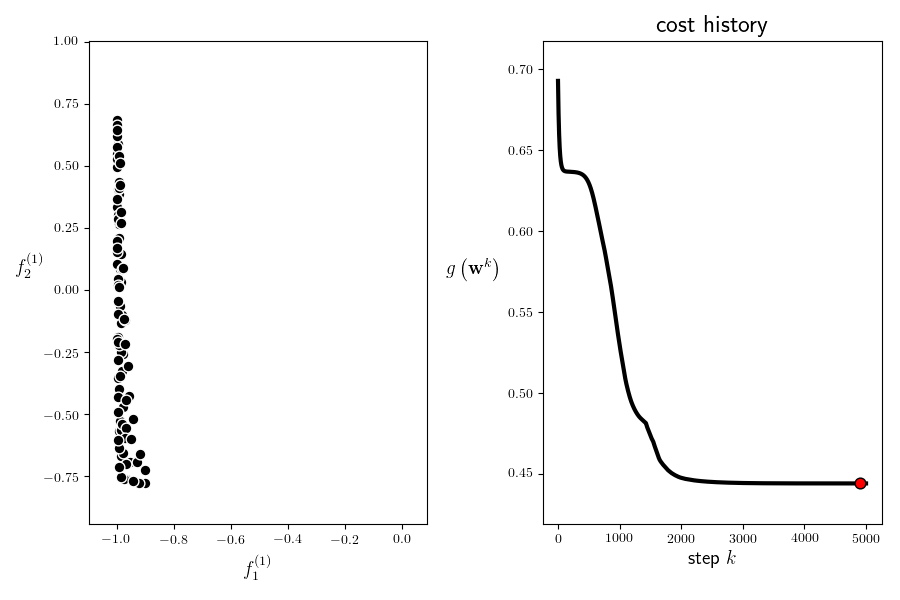
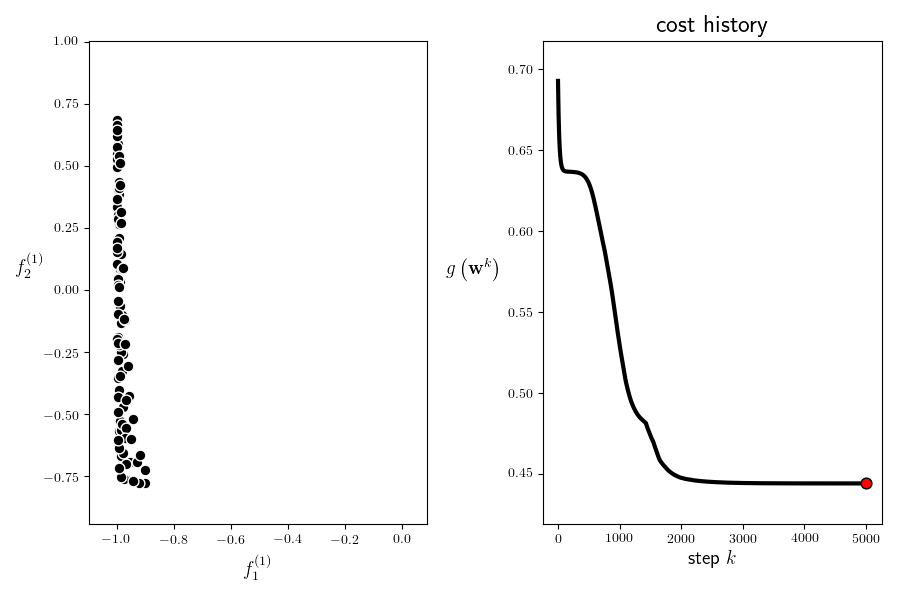

In [48]:
# show a plot of the distribution of each feature
frames = 50
demo2 = feature_plotter.Visualizer()
demo2.shifting_distribution(run,frames,x,show_history = True)

In [45]:
# run
alpha_choice = 10**(-1); max_its = 5000;
run2 = nonlib.basic_runner.Setup(x,y,feature_transforms_normalized,'softmax',normalize = 'standard')
run2.fit(w=w,alpha_choice = alpha_choice,max_its=max_its)


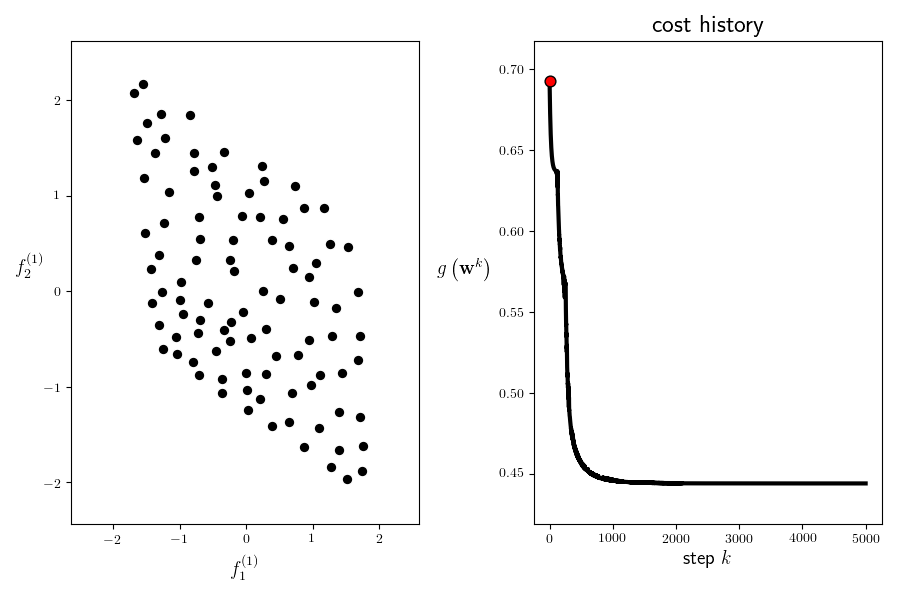
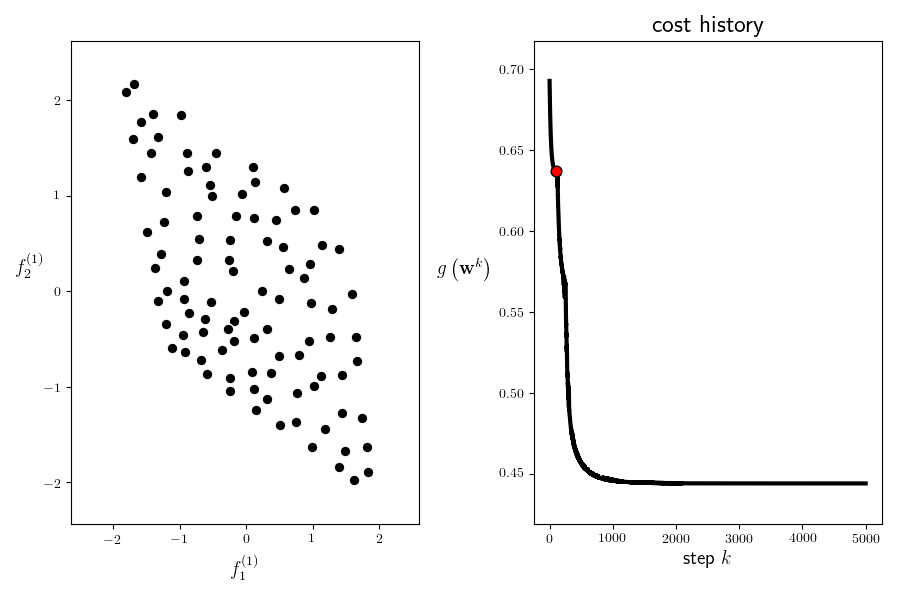
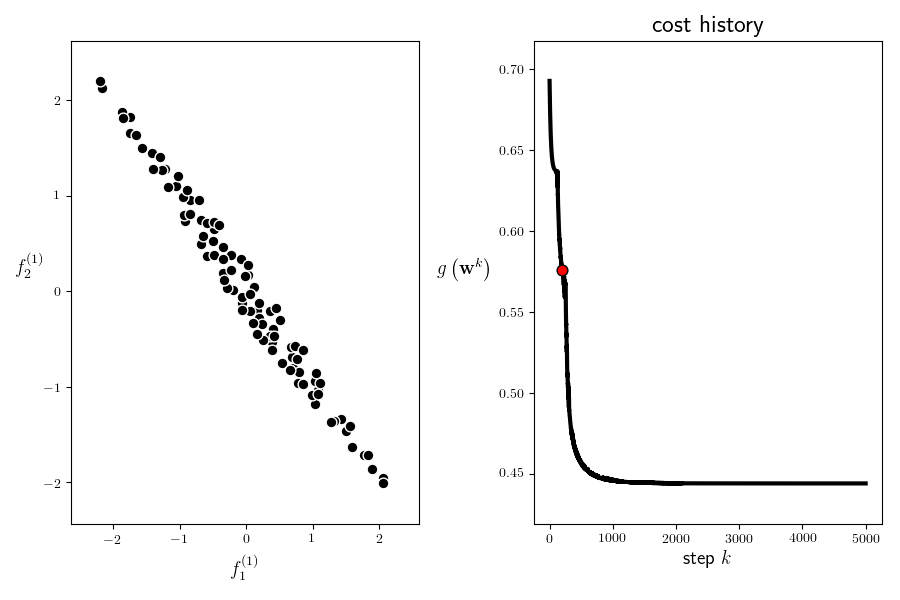
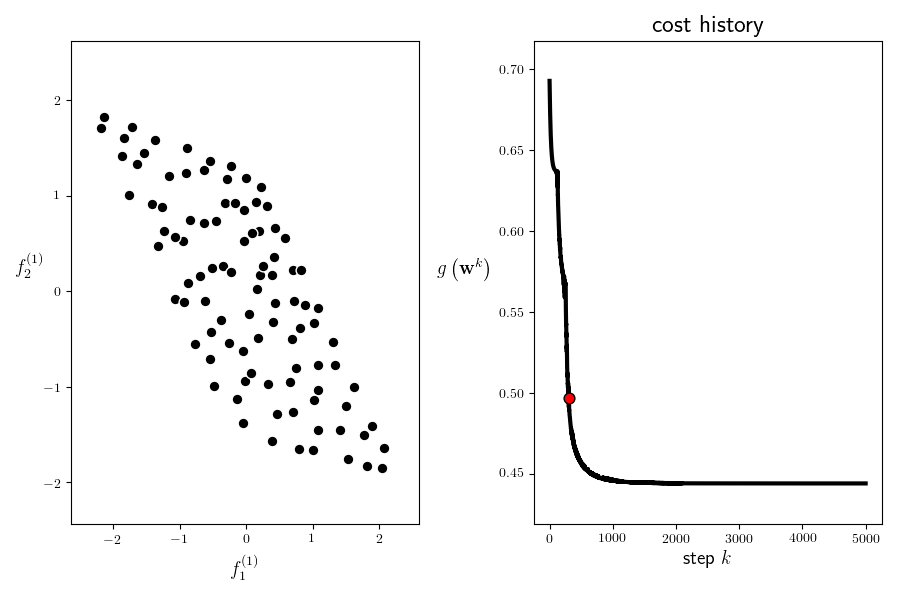
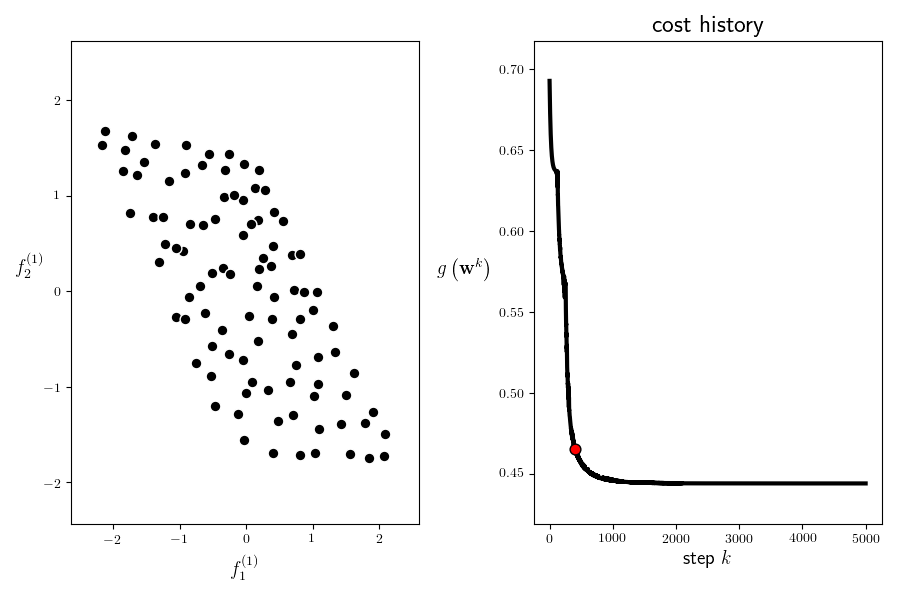
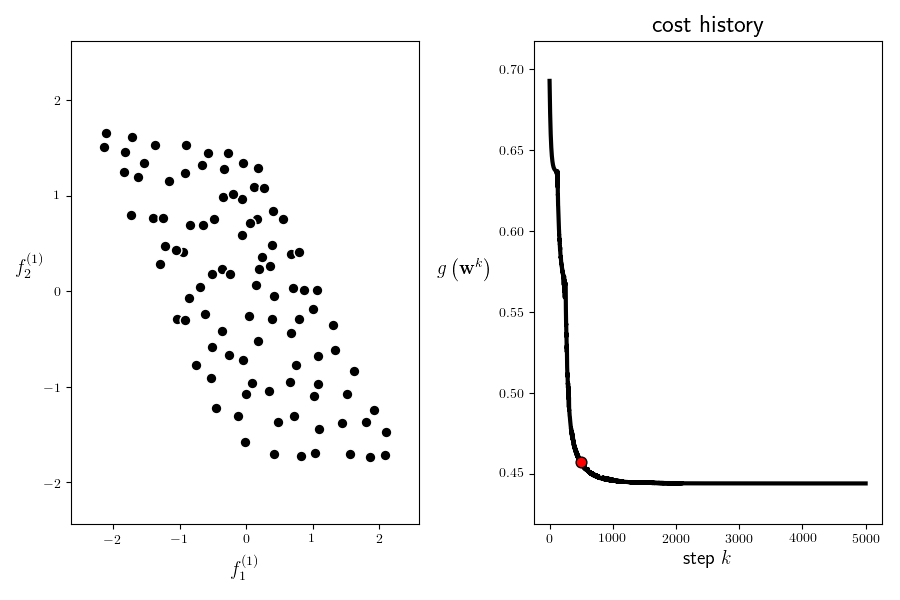
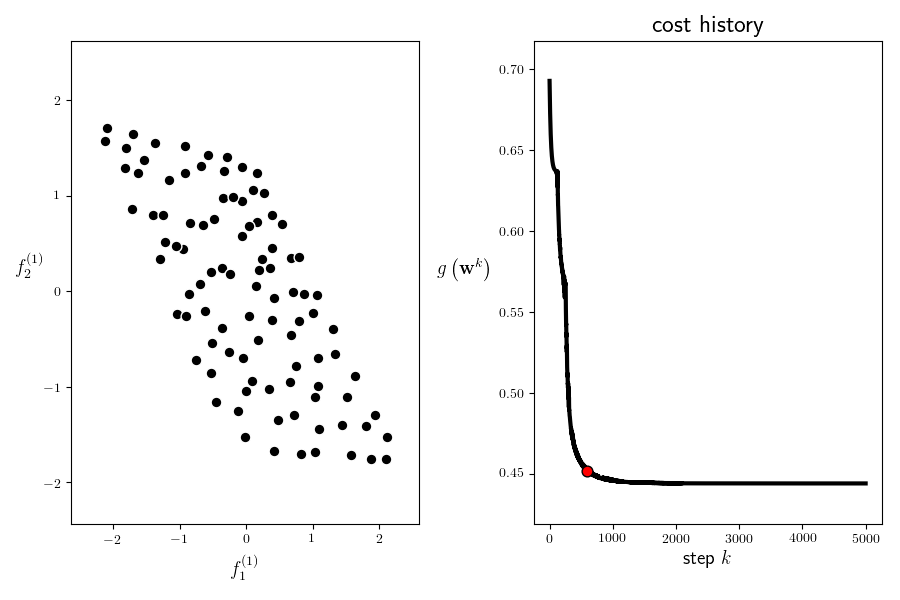
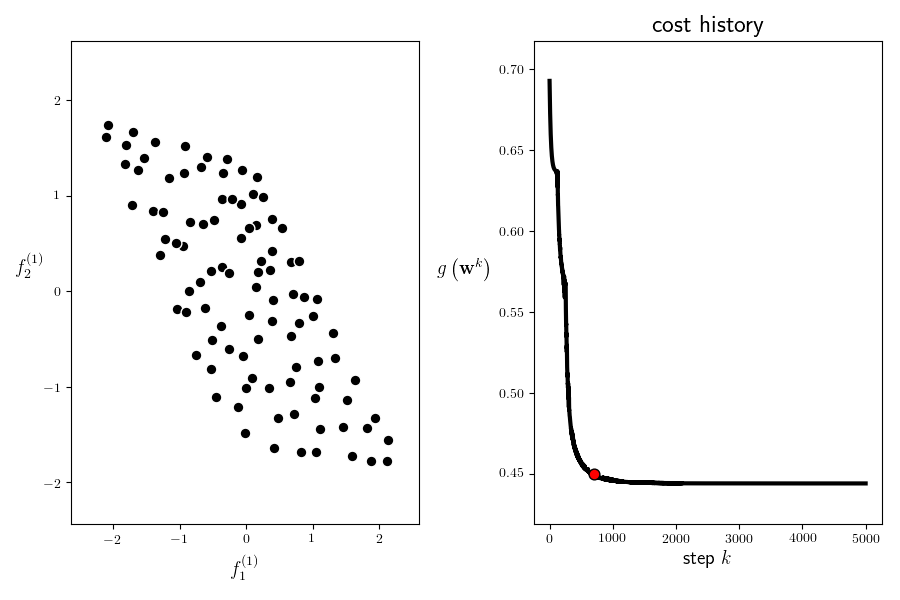
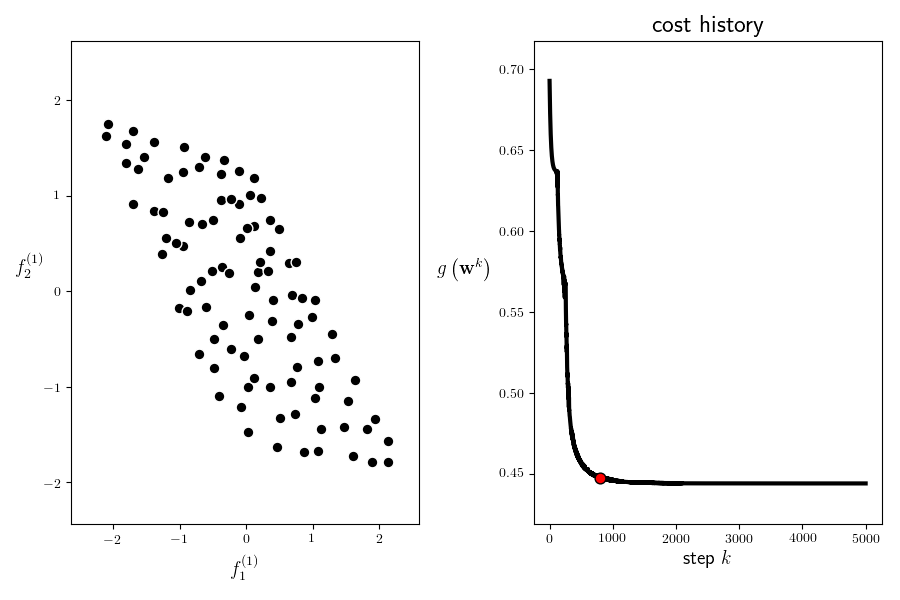
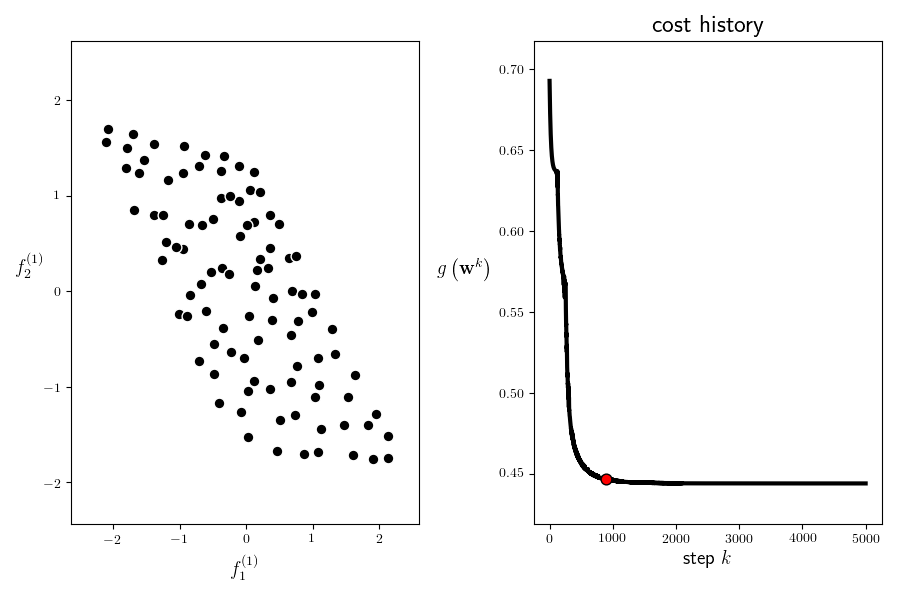
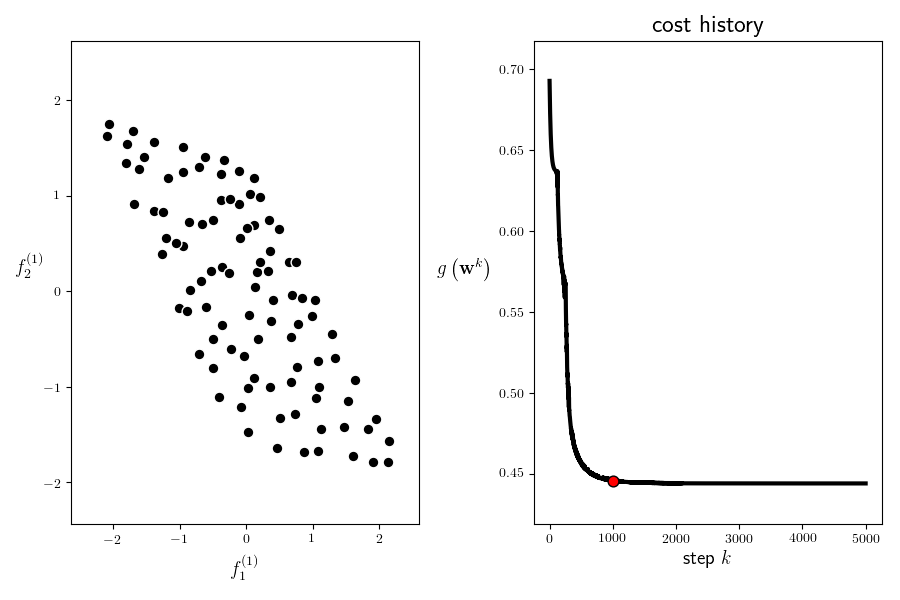
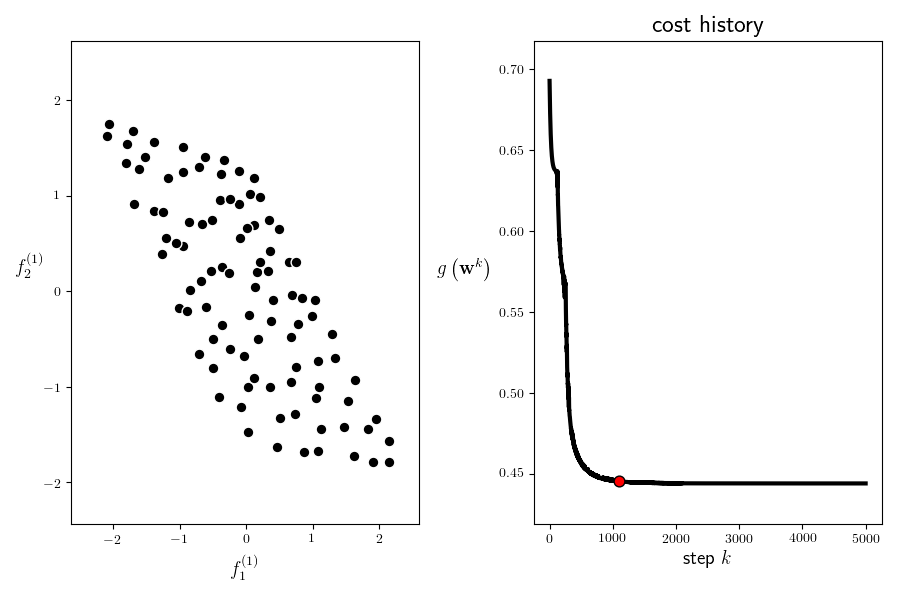
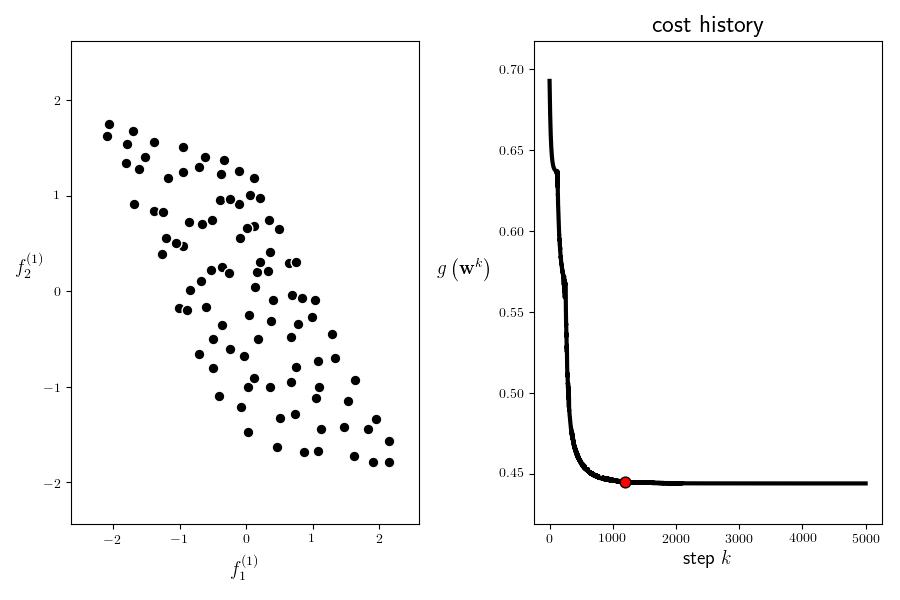
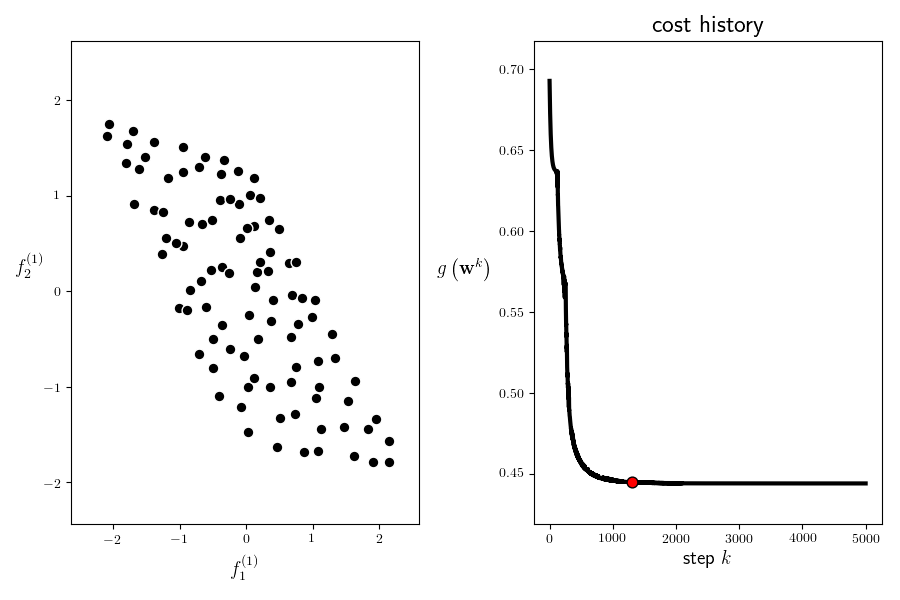
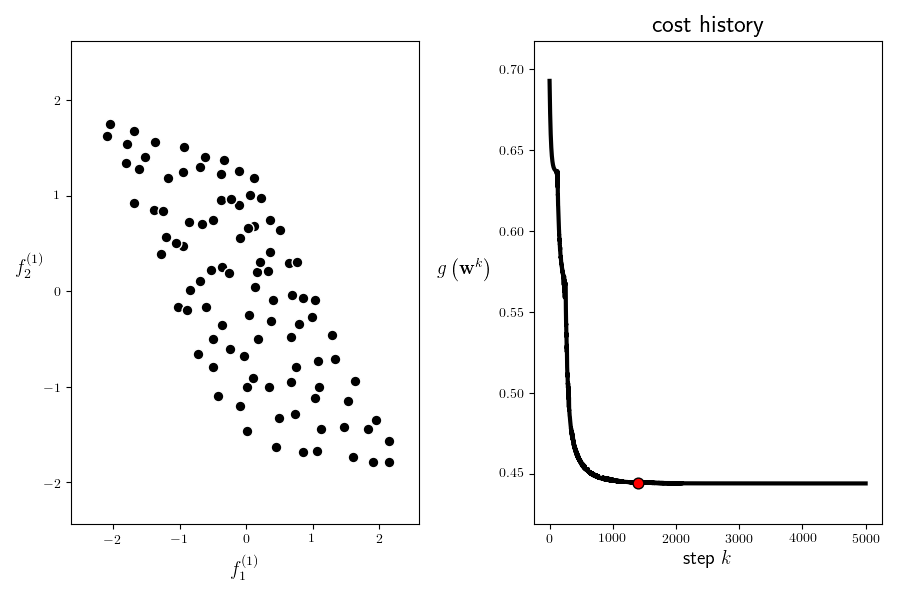
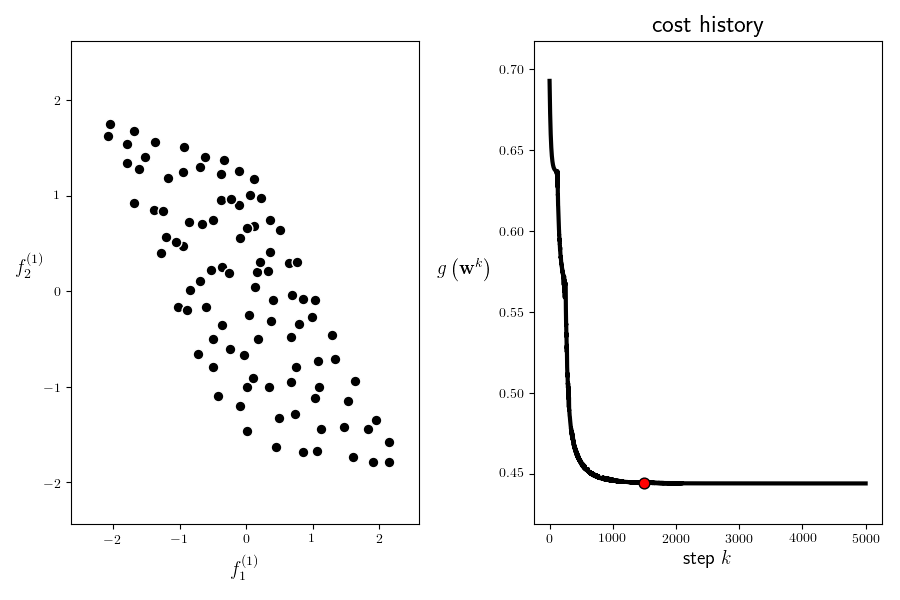
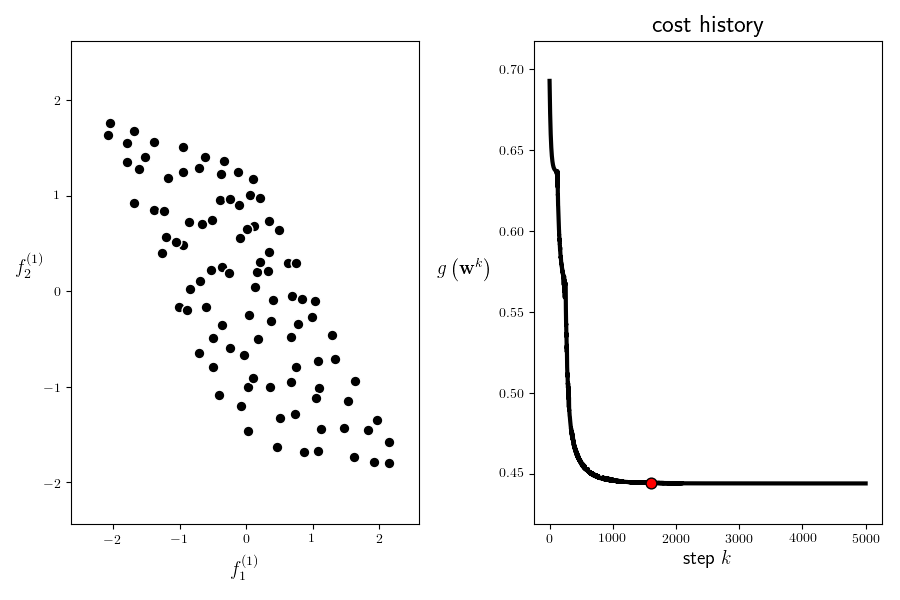
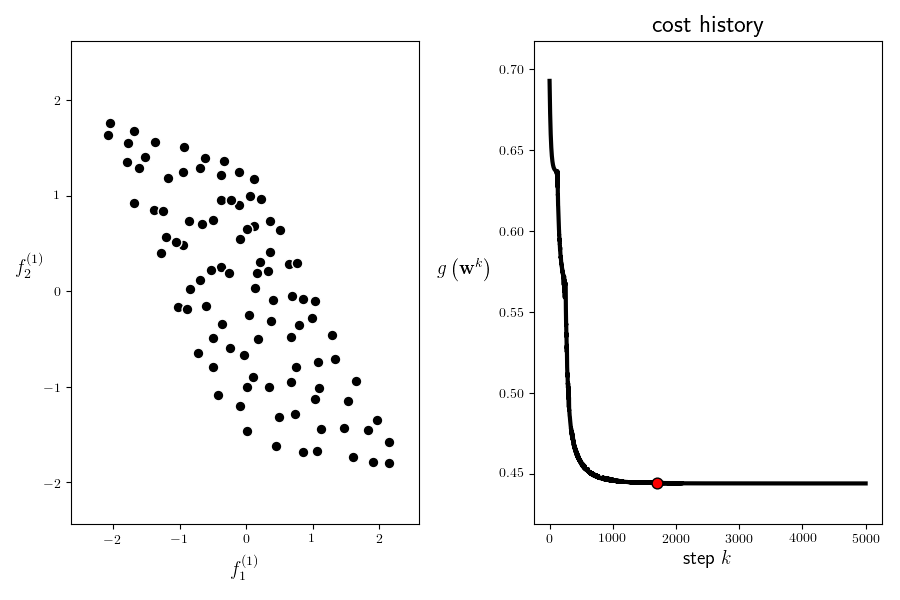
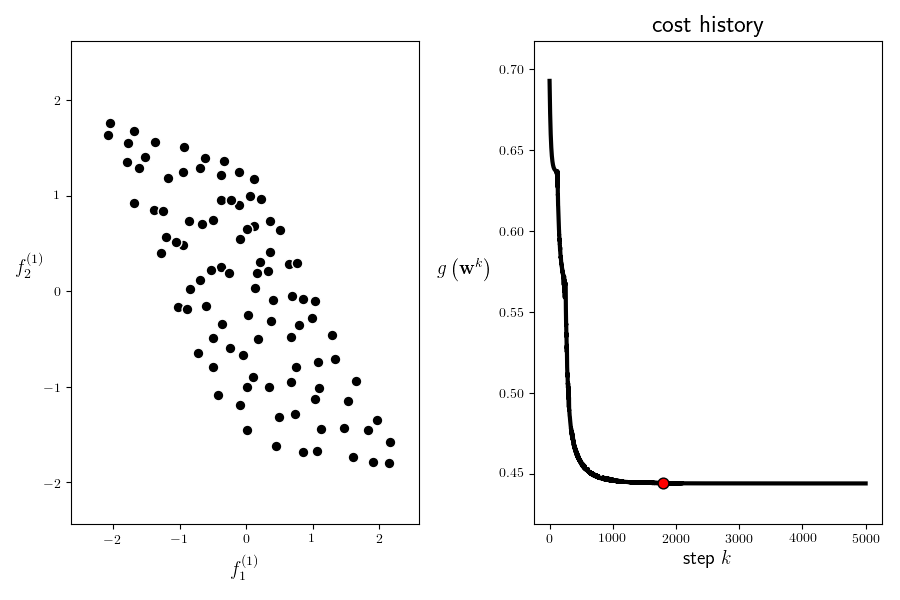
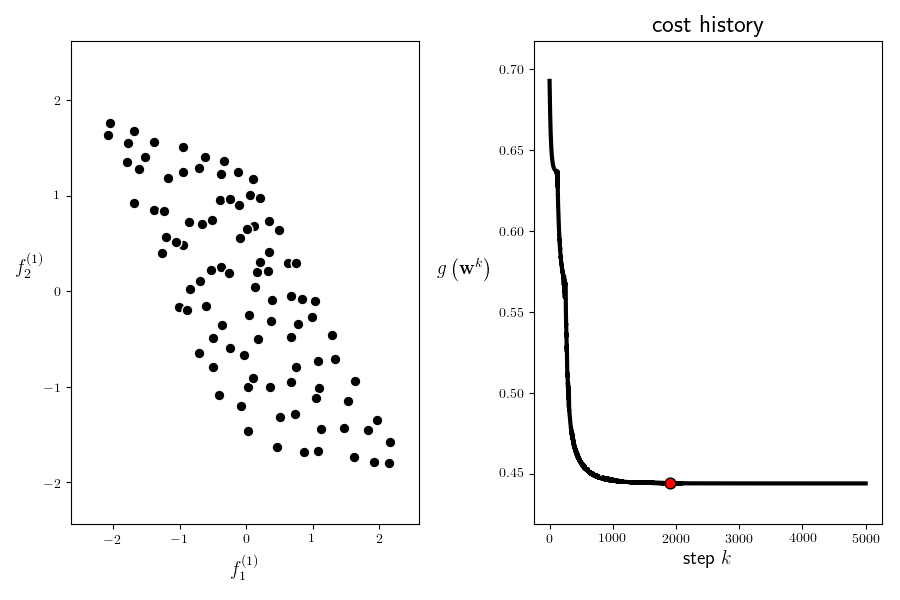
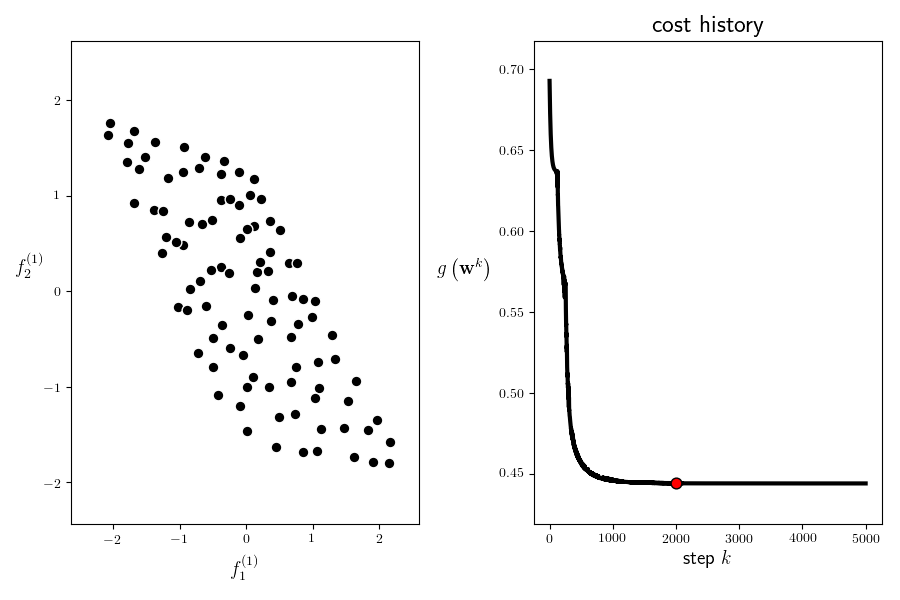
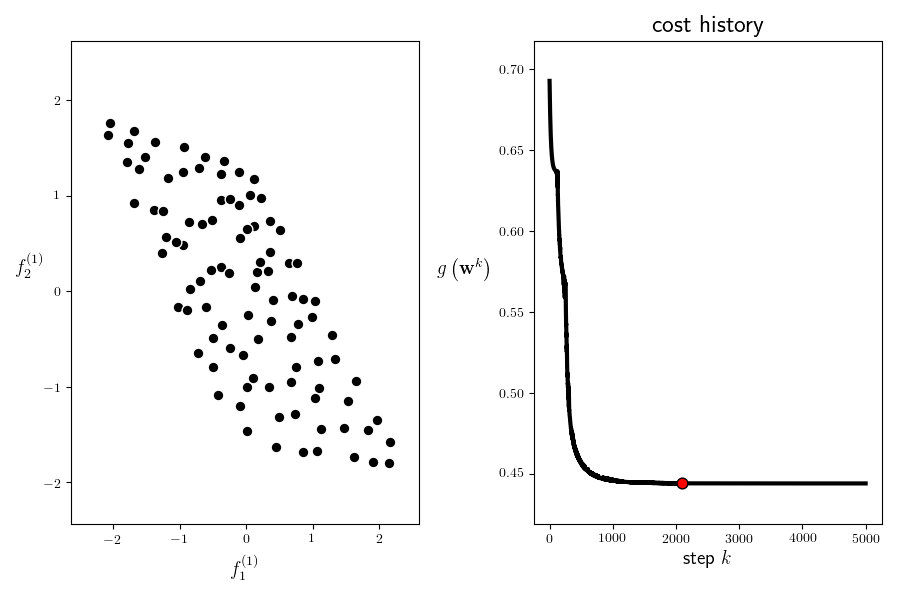
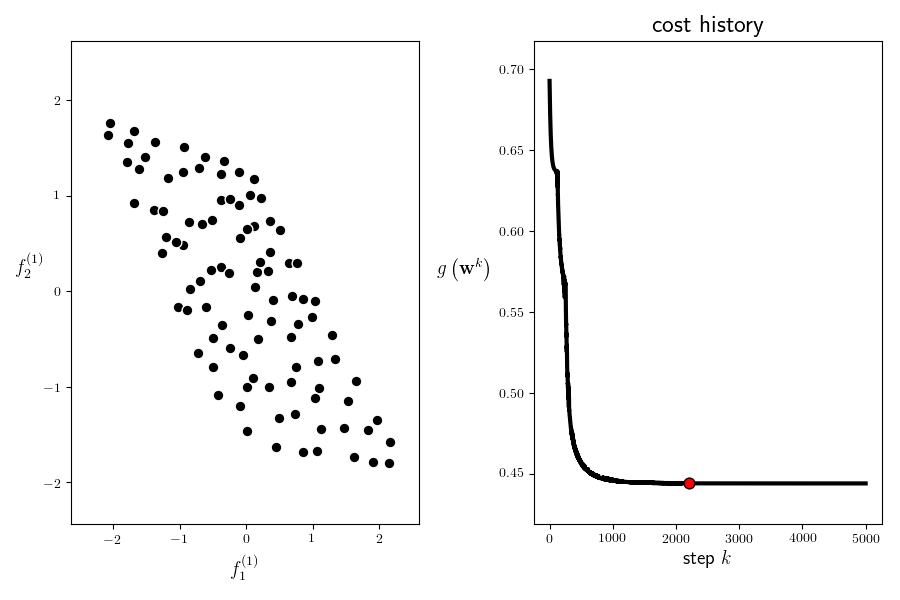
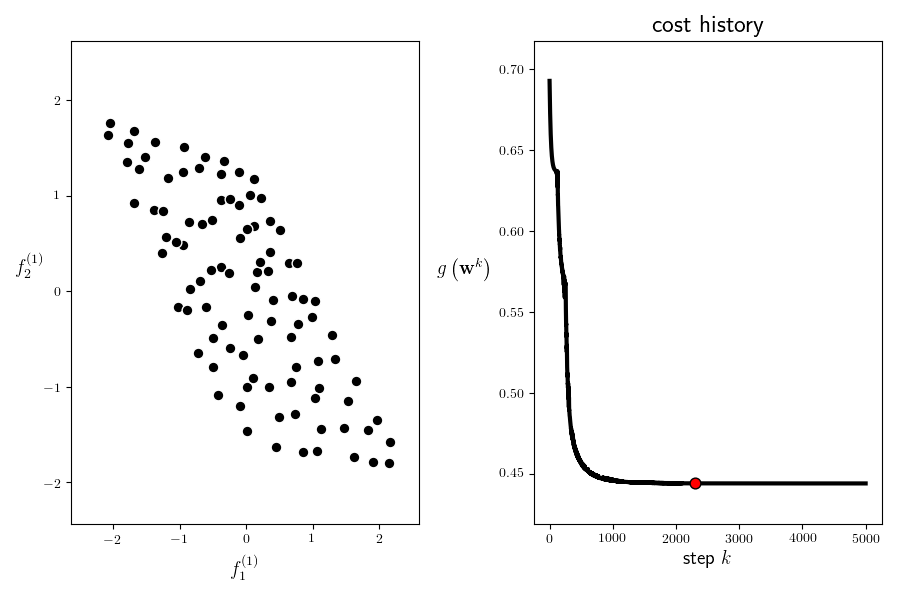
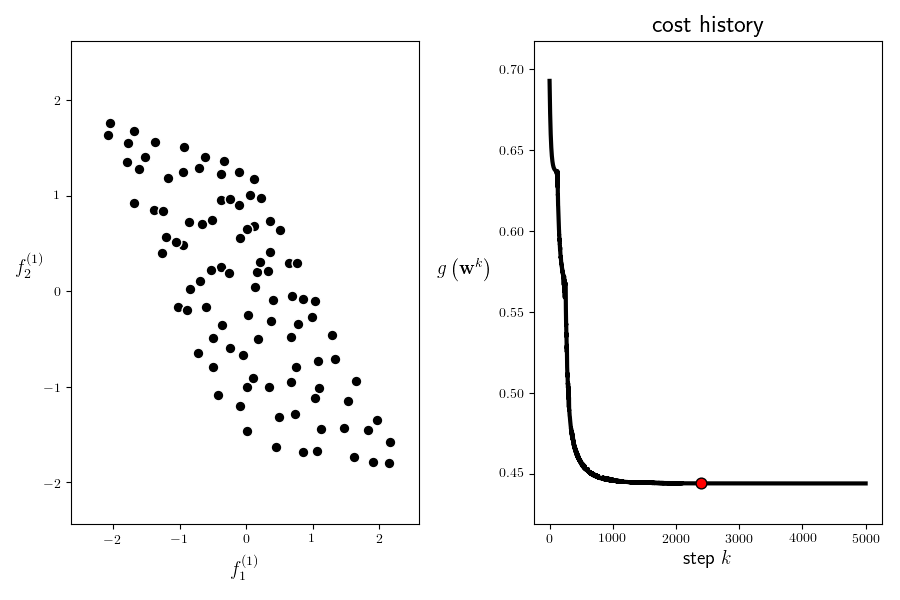
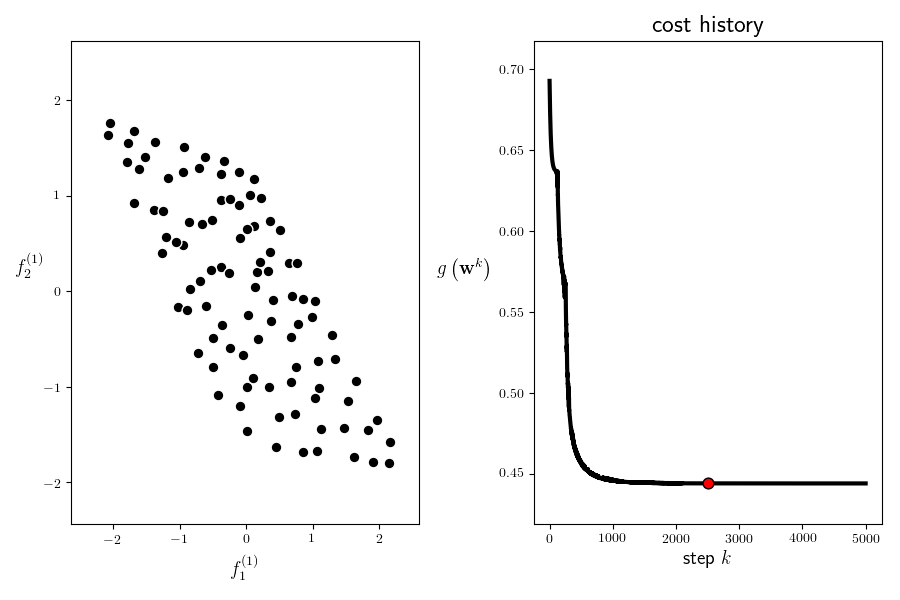
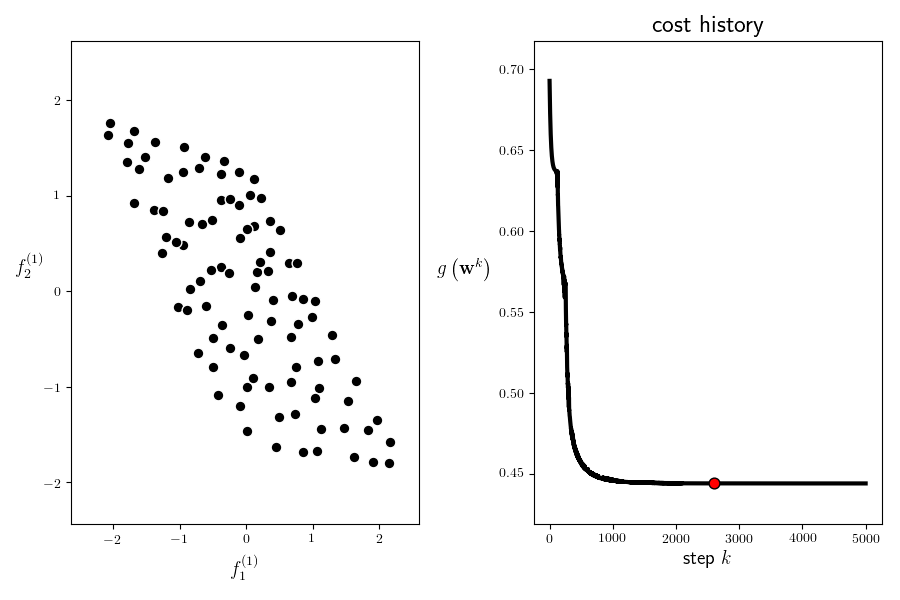
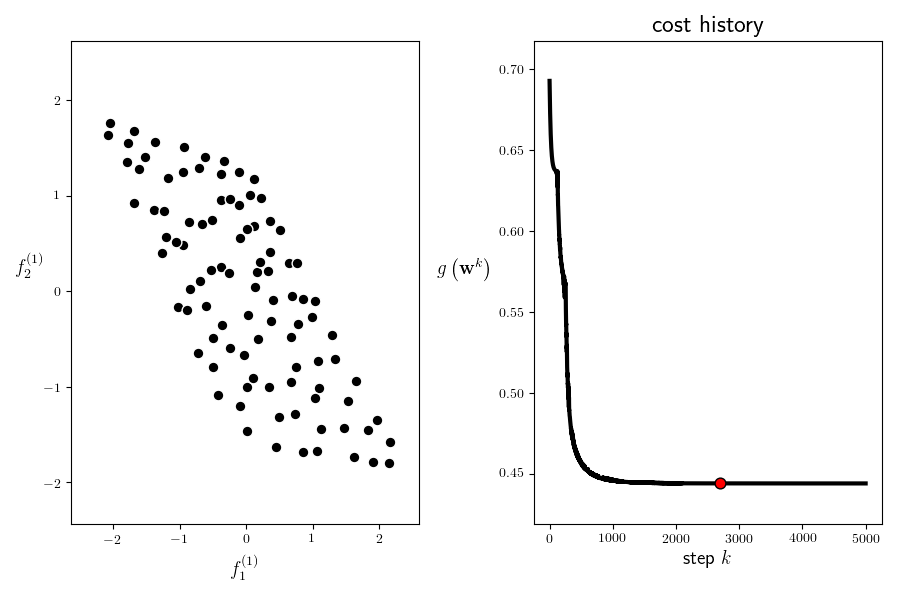
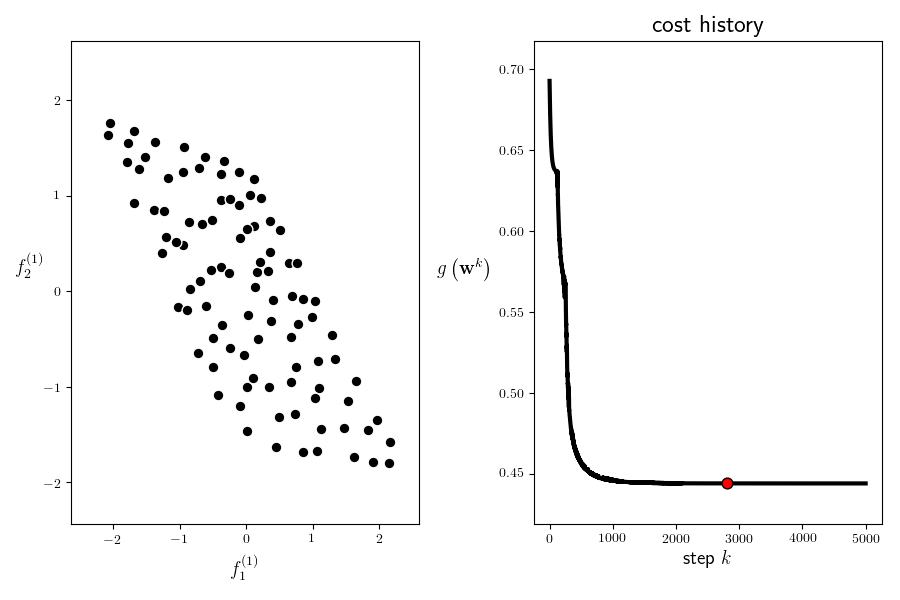
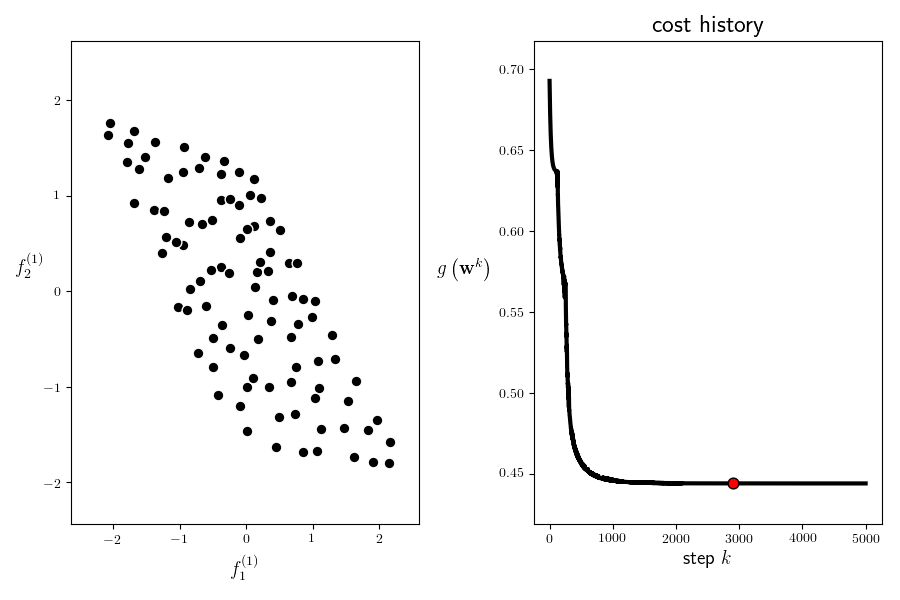
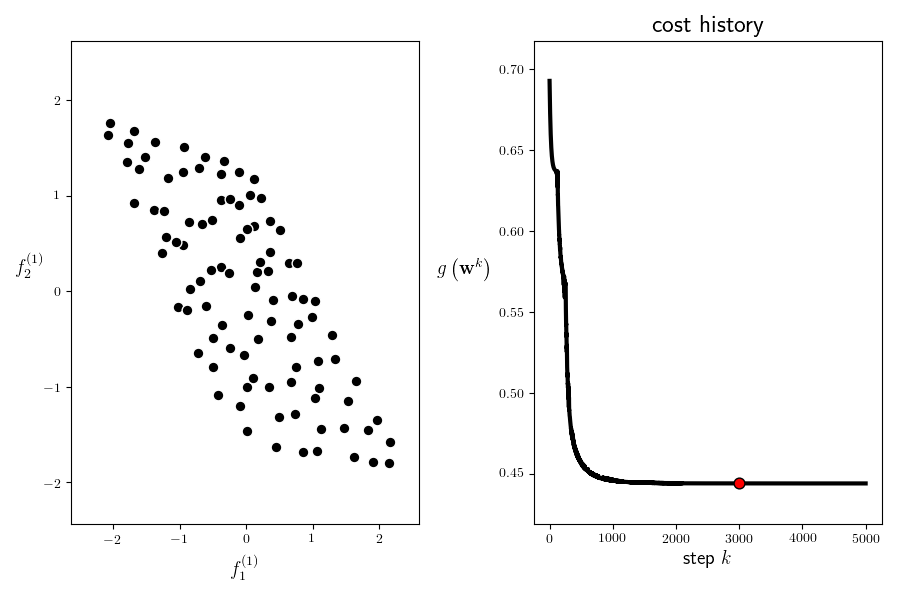
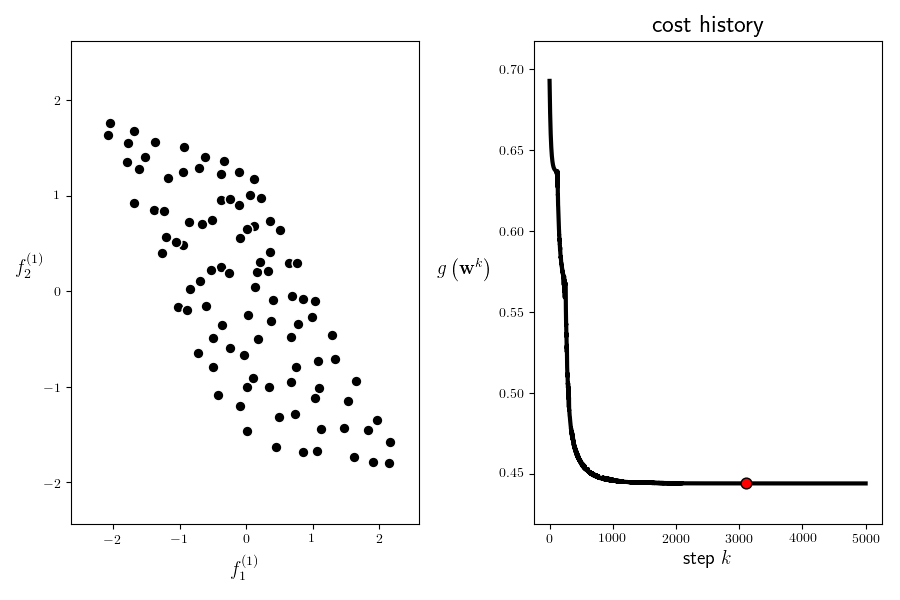
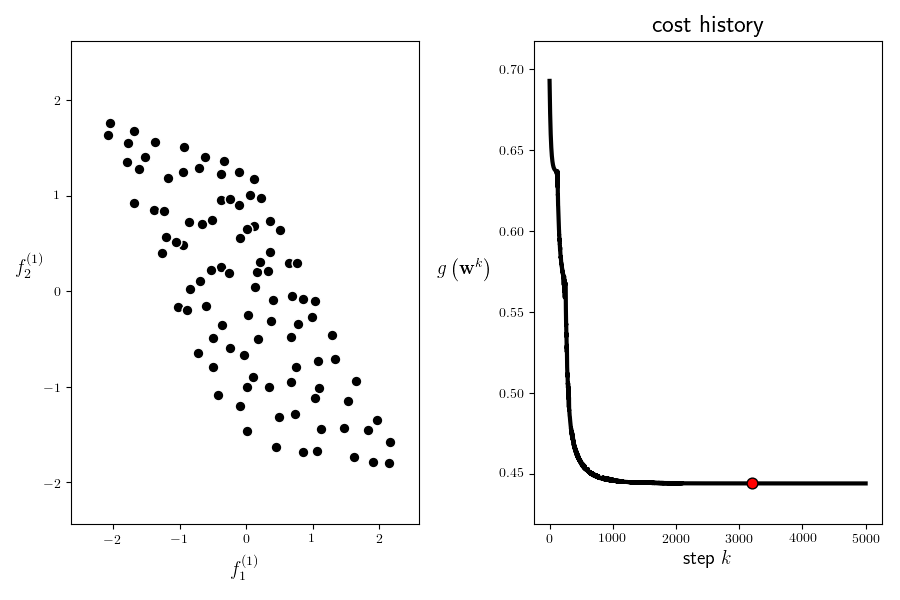
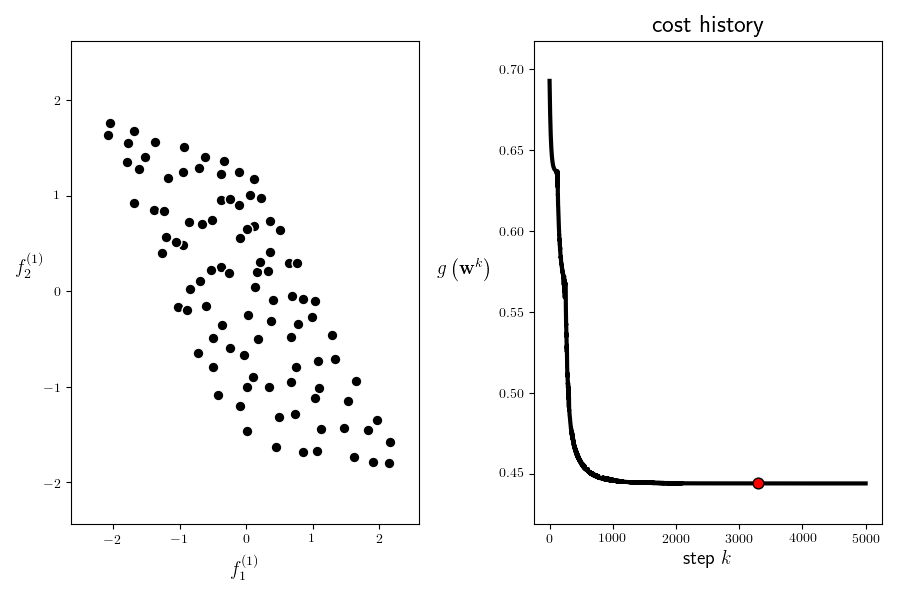
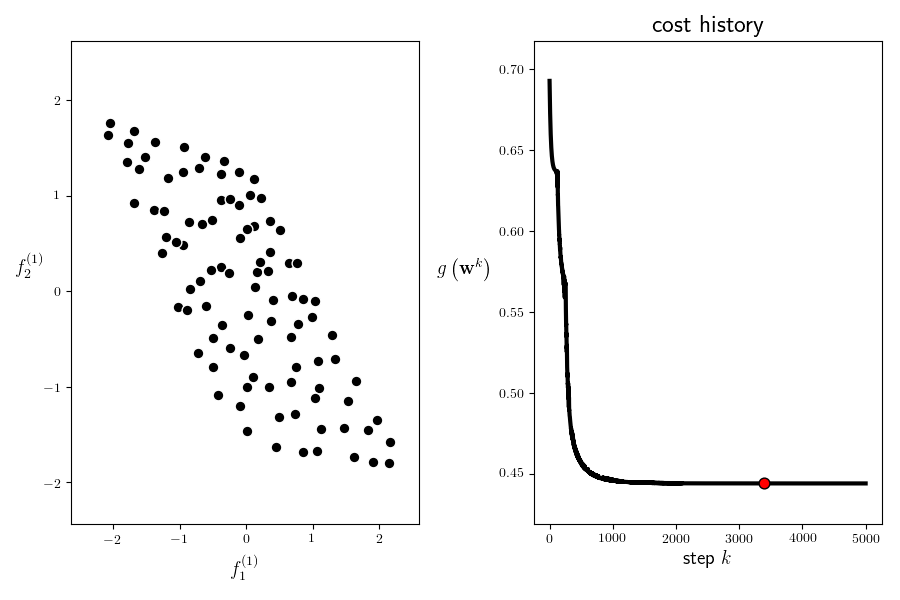
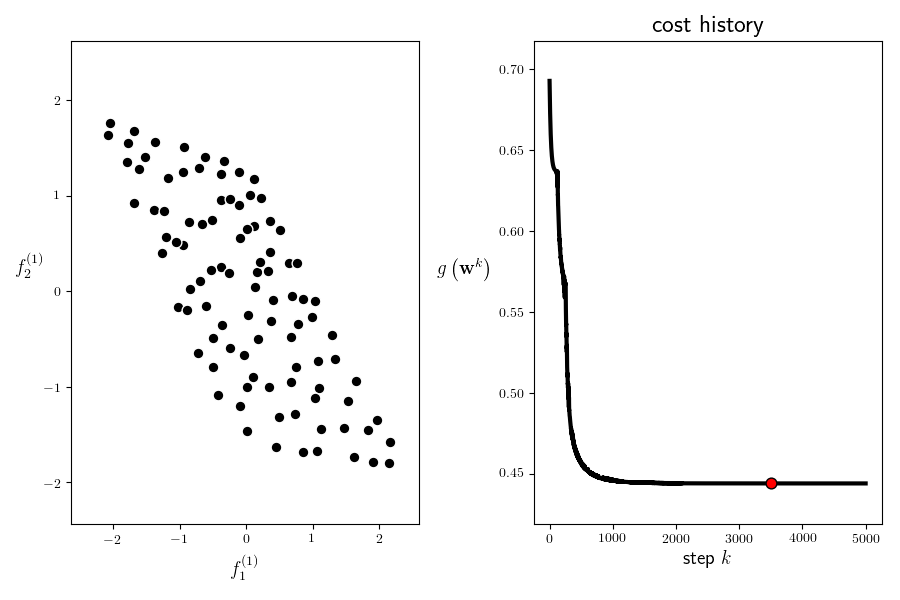
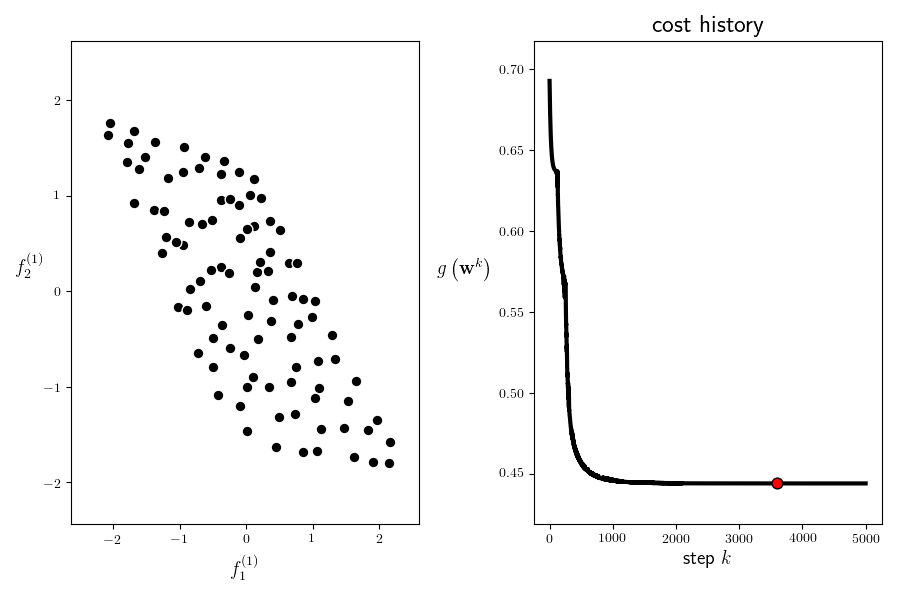
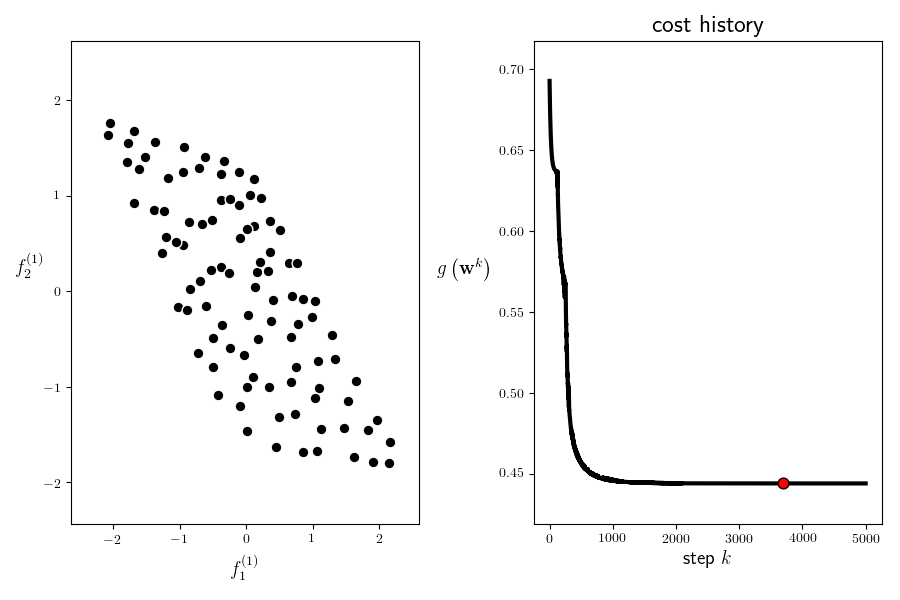
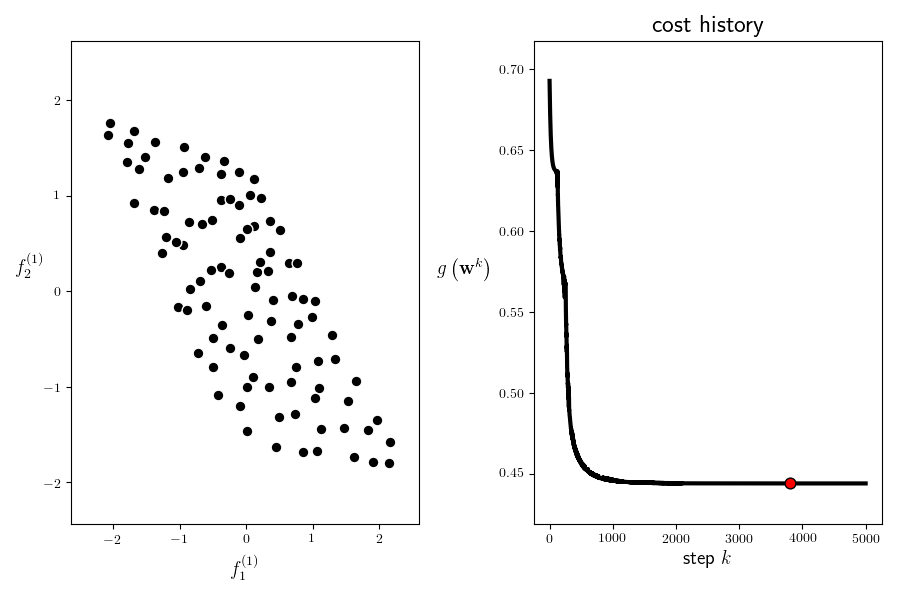
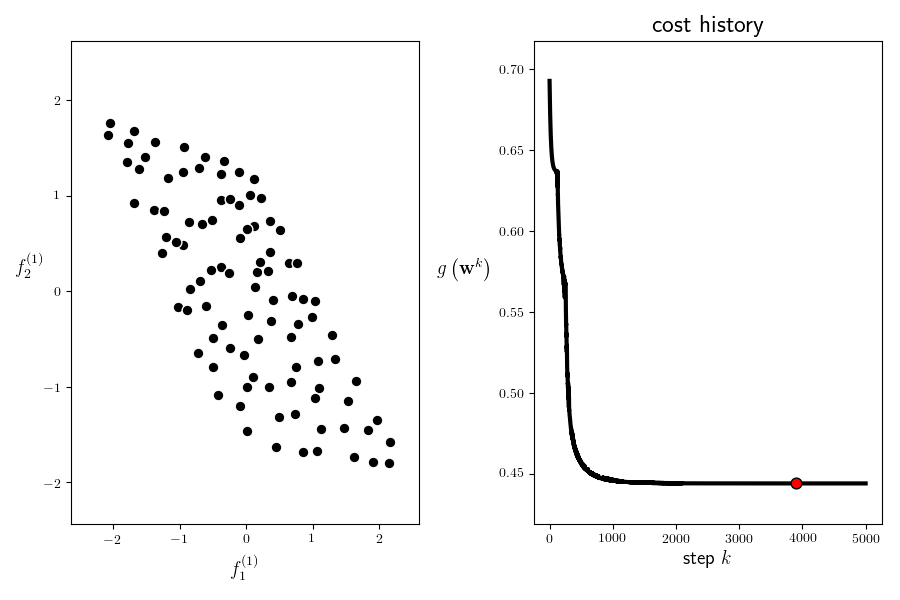
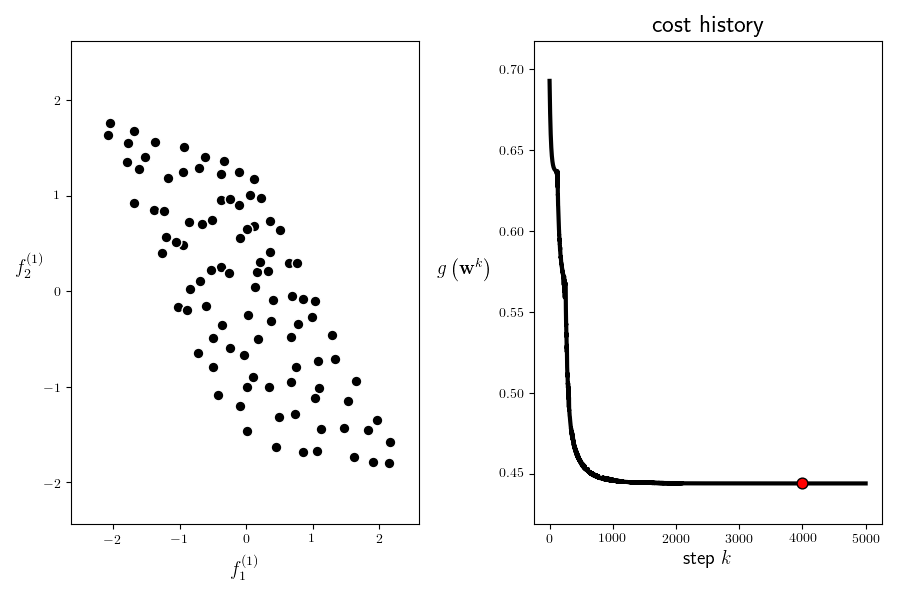
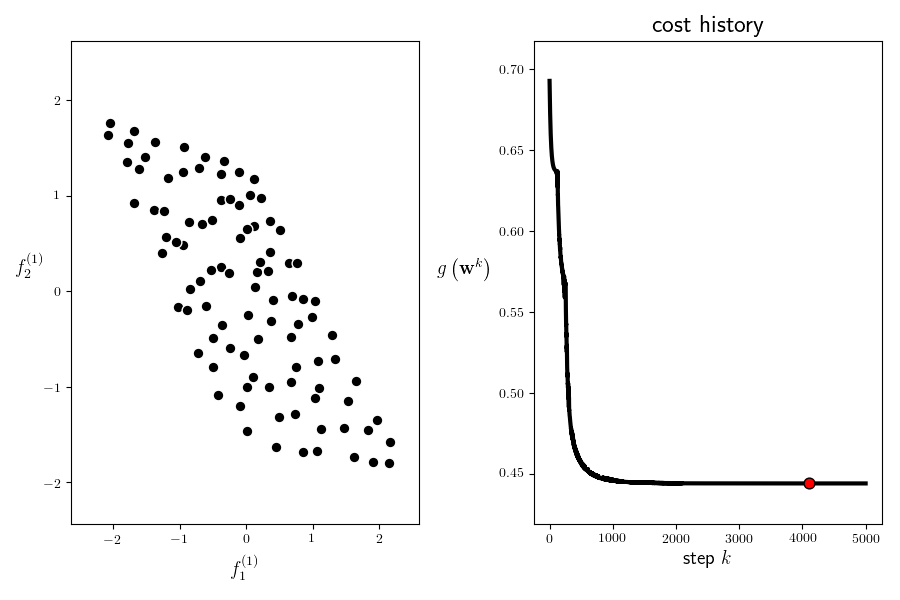
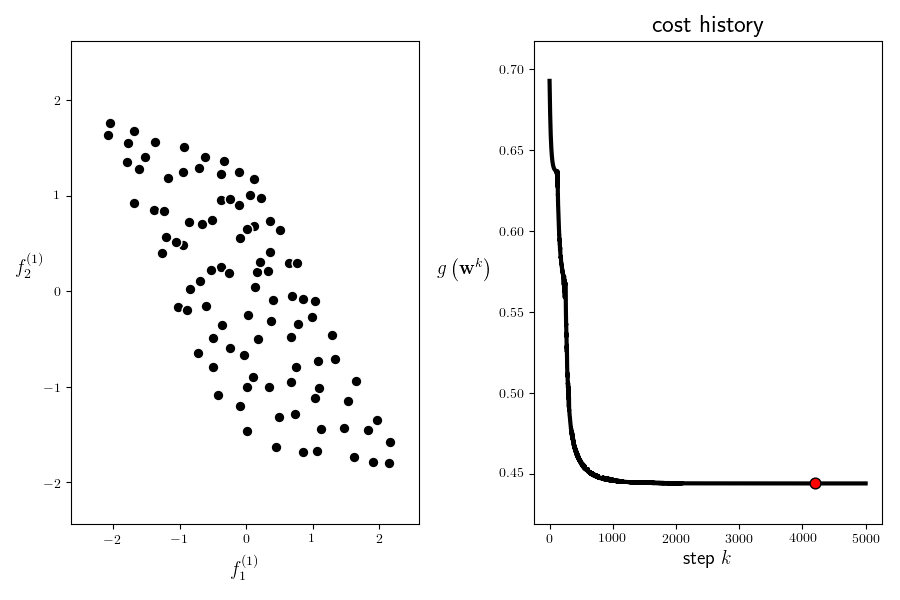
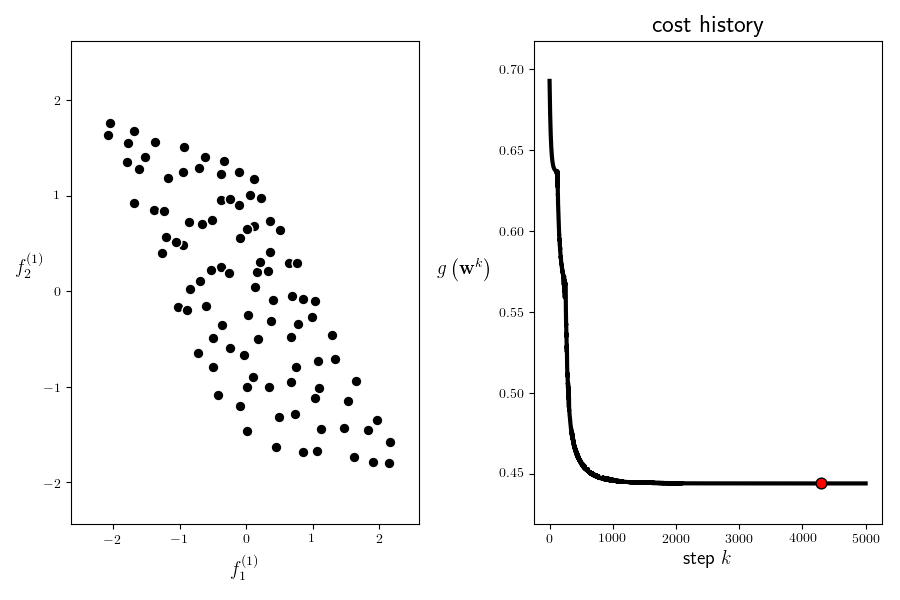
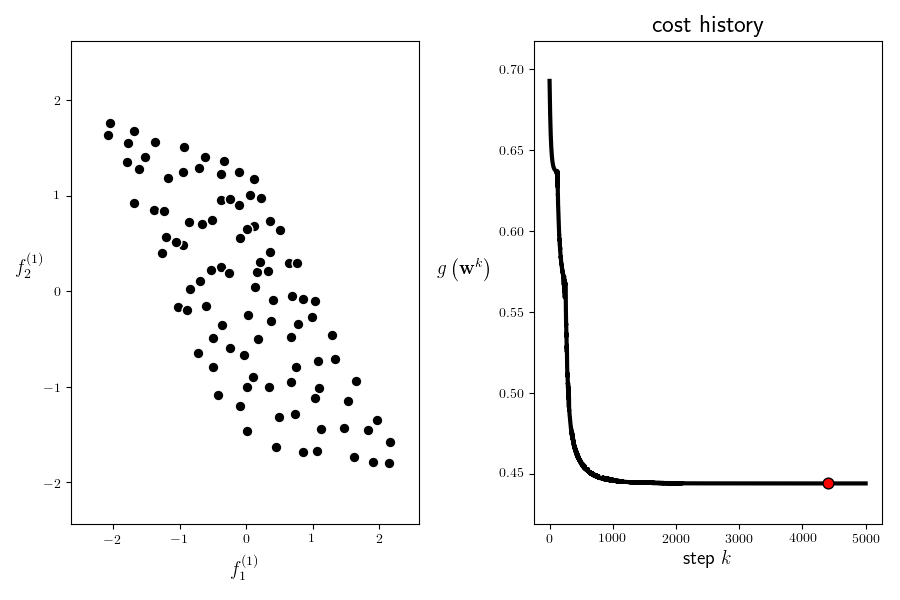
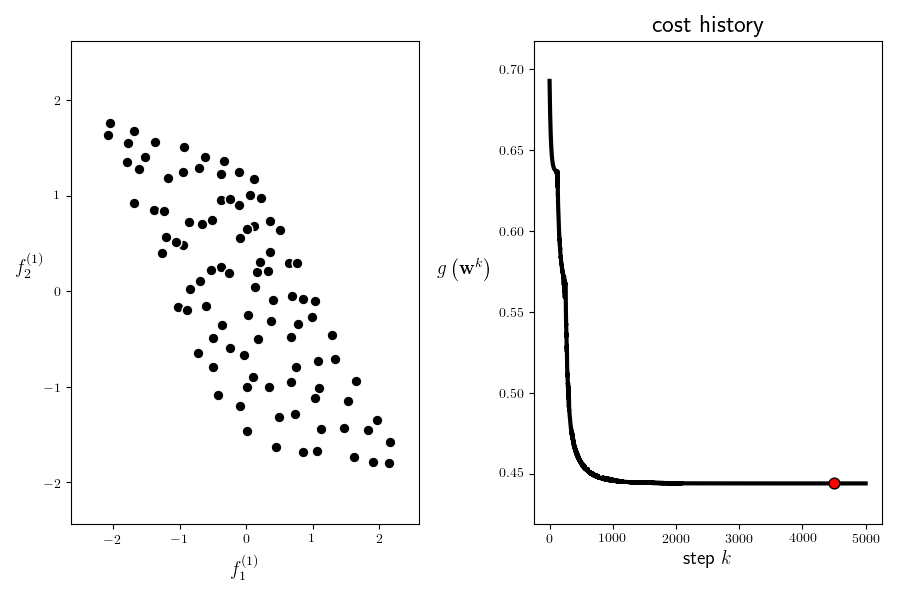
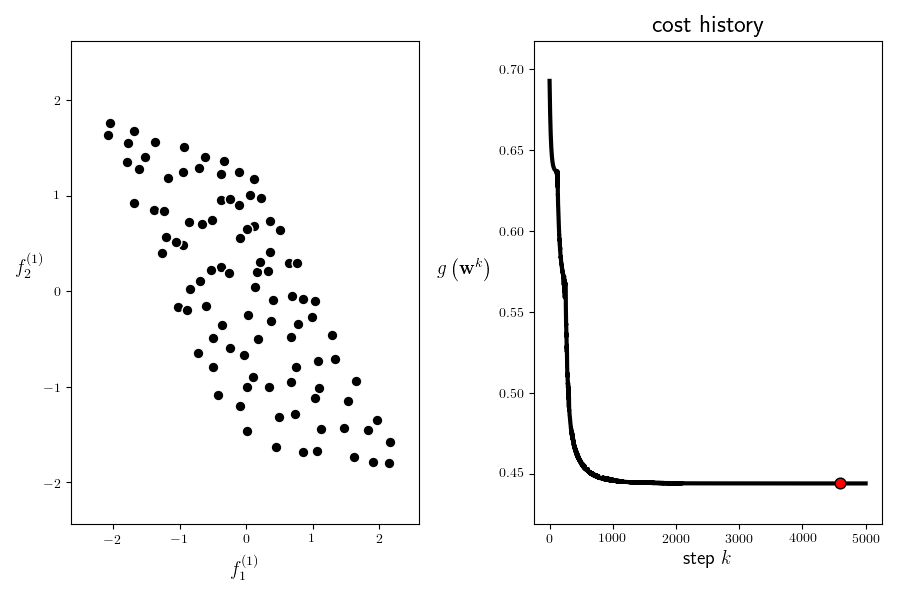
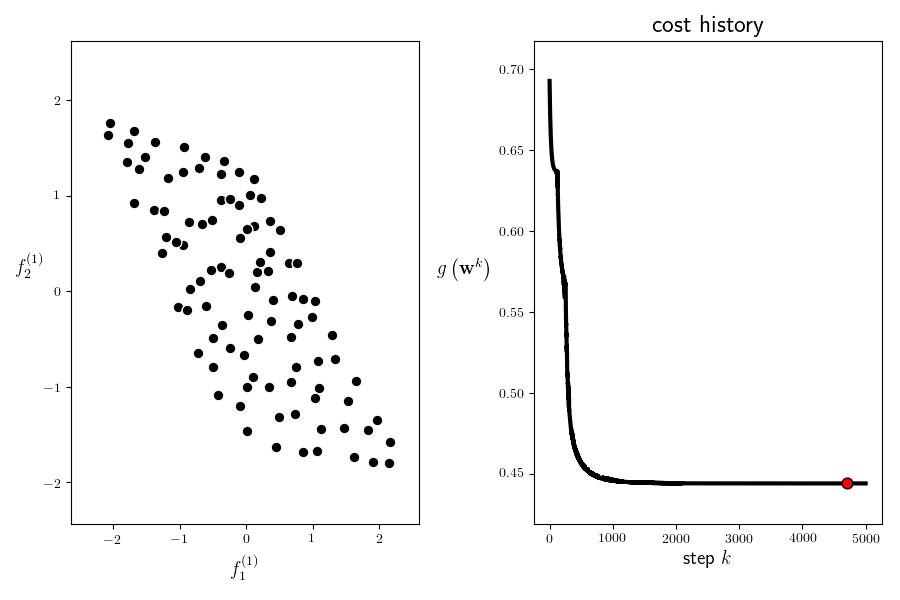
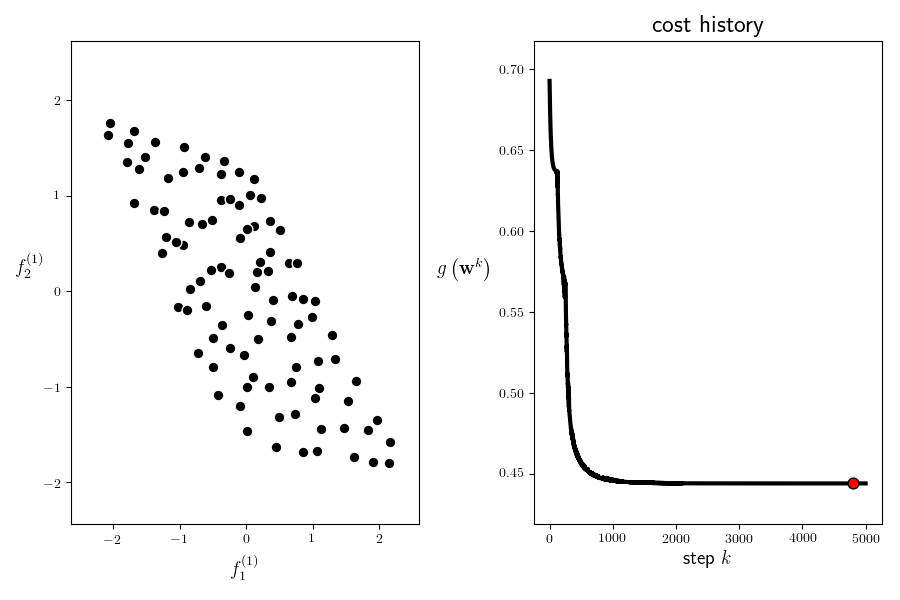
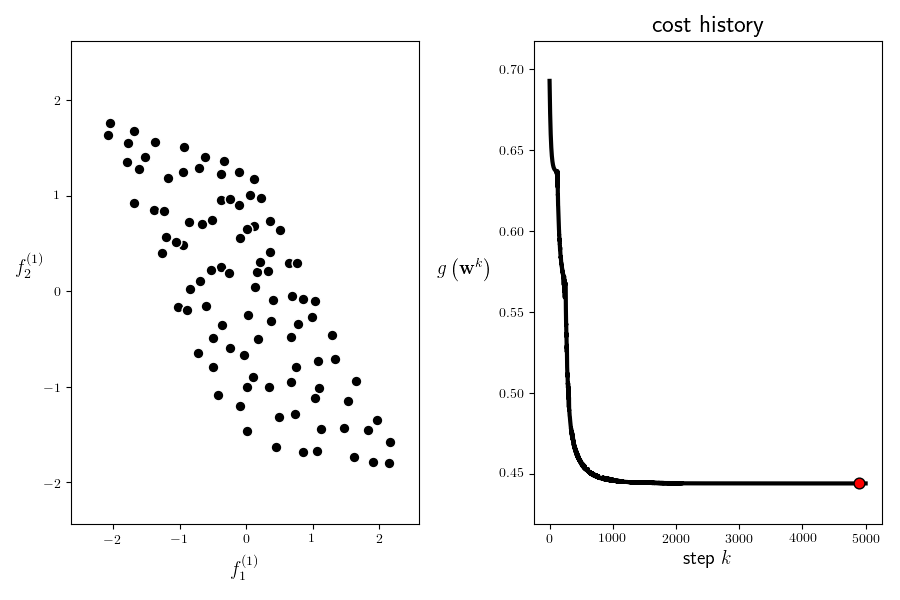
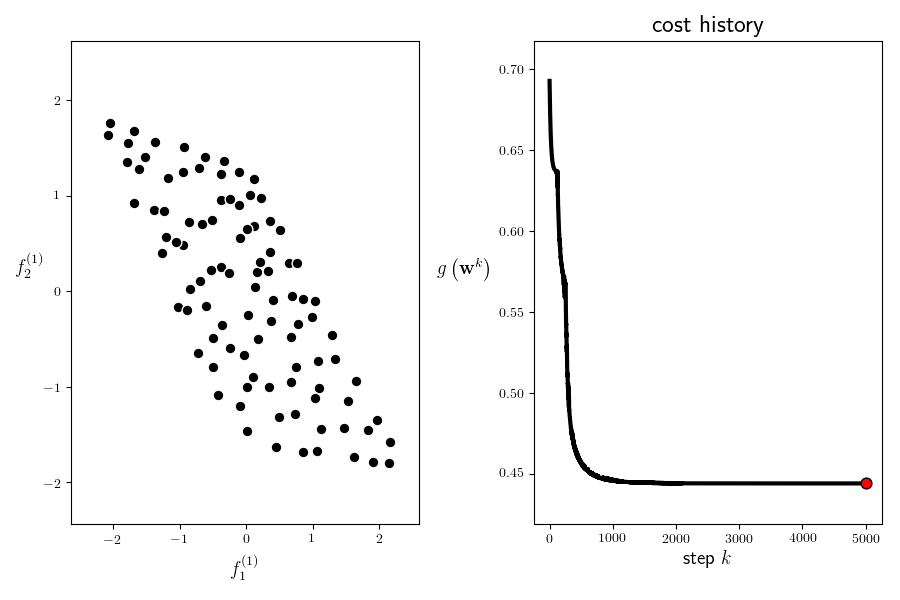

In [46]:
# show a plot of the distribution of each feature
frames = 50
demo2 = feature_plotter.Visualizer()
demo2.shifting_distribution(run2,frames,x,show_history = True,normalize = True)